In [1]:
import codecs
import multiprocessing
import os
import string
import gensim
import nltk
import numpy as np
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from nltk.corpus import stopwords
from matplotlib import pyplot as plt 
from collections import Counter
import matplotlib
from itertools import groupby
import pandas as pd
from sklearn.utils import shuffle 
from keras import optimizers
from keras.layers import Dense, Dropout, regularizers
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


# 将文档数据，分好词，然后去掉了特殊字符
def splitSentence(content):
    '''
    将文件内容转换成句子
    :param content: 文件内容
    :return: 文件的所有句子
    '''
    sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sents = sent_tokenizer.tokenize(content)
    return sents


def cleanLines(sents):
    '''
    句子去掉特殊字符，全部替换成"."
    :param lines:
    :return:
    '''
    sentsResults = []
    for sent in sents:
        delEStr = string.punctuation + string.digits 
        outtab = ""
        for i in range(len(delEStr)):
            outtab += "."
        str_trantab = str.maketrans(delEStr, outtab)
        sent = sent.translate(str_trantab)
        
        sentsResults.append(sent.lower())
       
    return sentsResults


def sentenceToWord(sents):
    '''
    句子截取出单词
    :param sents: 所有的句子
    :return: 截取出的所有单词
    '''
    words = []
    for sent in sents:
        sent_words = nltk.word_tokenize(sent)
        
        #去掉停用词
        list_stopWords=list(set(stopwords.words('english')))
        filtered_words=[w for w in sent_words if not w in list_stopWords]
        
        for word in filtered_words:
            word_splits = word.split(".")
            for key in word_splits:
                if key == "":
                    continue
                else:
                    words.append(key)
    return words


def getWordList(filePath):
    file = open(filePath, "r", errors='ignore')
    sents = splitSentence(file.read())
    sents = cleanLines(sents)
    words = sentenceToWord(sents)
    return words




c:\python35\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


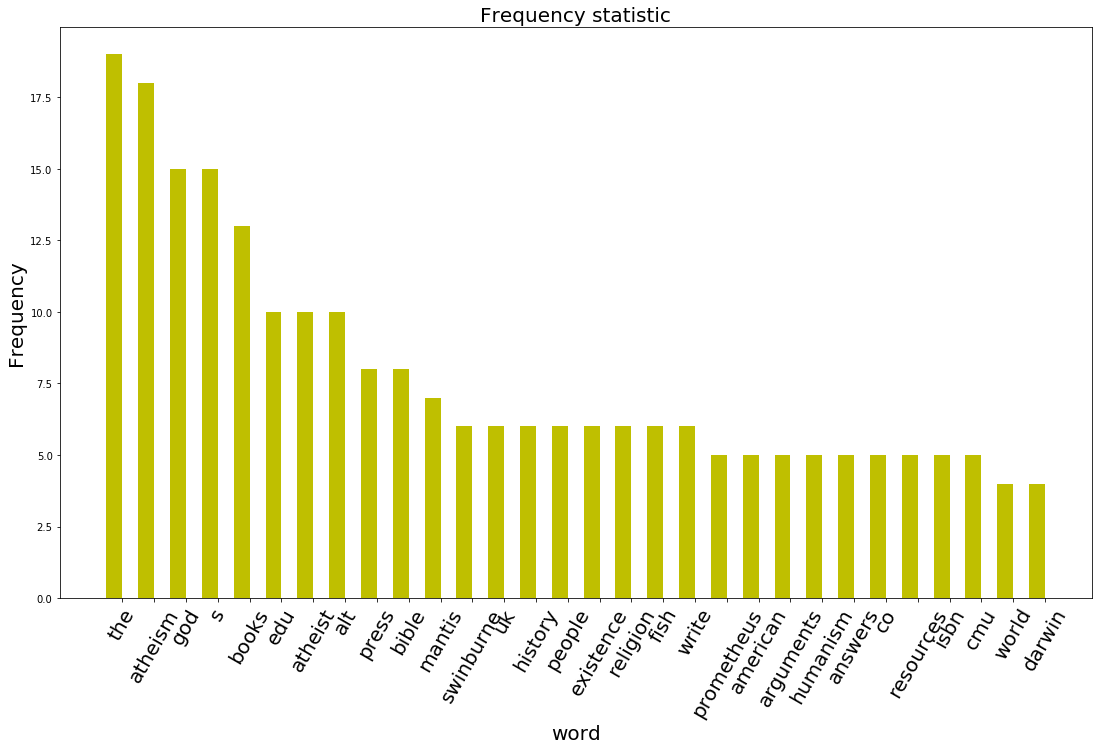

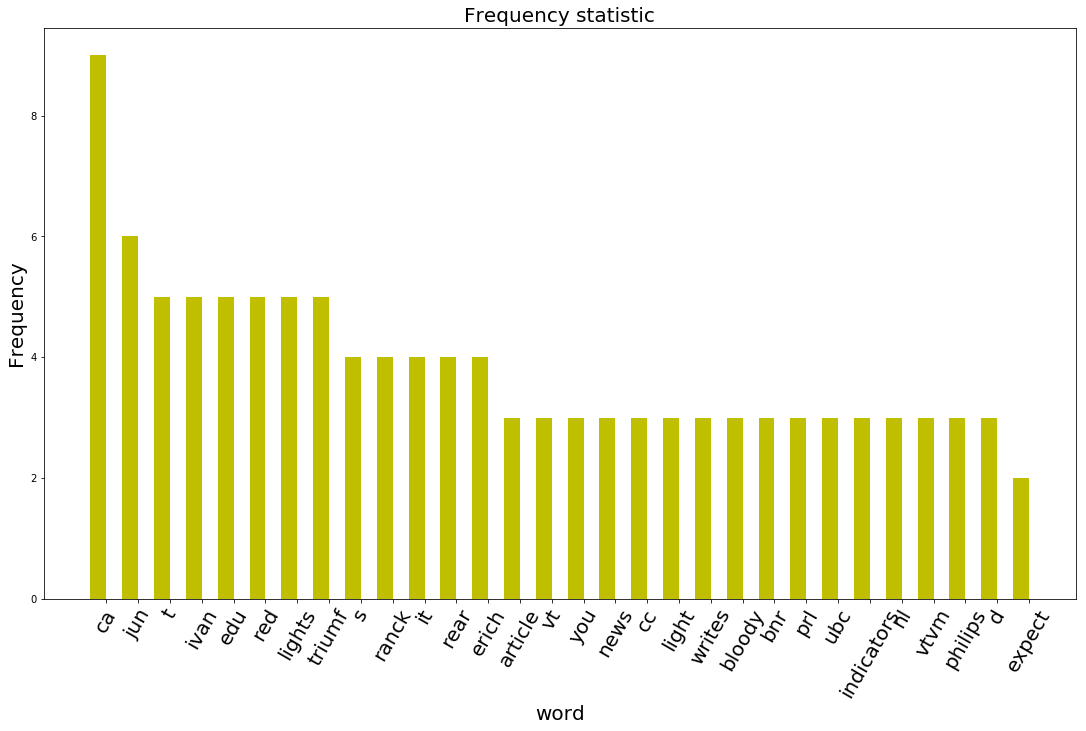

In [2]:
#统计某个文档词频最高的wordsCount个单词
def statisticWordFrequency(filePath,wordsCount):
    words = getWordList(filePath=filePath)
    counter = Counter(words)
    x,y = [],[]
    for key in counter.most_common(wordsCount):
        x.append(key[0])
        y.append(key[1])
    barwidth = 0.5  
    xVal = np.arange(len(x))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xlabel("word" ,fontsize=20)
    plt.ylabel("Frequency",fontsize=20)
    plt.title("Frequency statistic" ,fontsize=20)
    plt.xticks(xVal+barwidth/2.0,x,rotation=60 ,fontsize=20)
    plt.bar(xVal,y,width=barwidth,capsize = wordsCount,color='y')
    plt.show()
    
statisticWordFrequency("data/alt.atheism/49960",30)
statisticWordFrequency("data/rec.motorcycles/72052",30)

In [3]:
from wordcloud import WordCloud

#生成文档词云
def staticWordCloud(filePath):
    text = open(filePath,'r',errors='ignore').read()  
    wc = WordCloud(background_color="white",random_state=42,max_font_size=50)  
    wc.generate(text)
    plt.imshow(wc)  
    plt.axis("off")  
    plt.figure()  
    plt.show()

staticWordCloud("data/alt.atheism/49960")
staticWordCloud("data/rec.motorcycles/72052")


ImportError: No module named 'wordcloud'

In [4]:
#遍历所有文档得到文档的单词个数
docs = []
wordcount = []
wordsList = []

def getAllNews(filePath):
    if os.path.isdir(filePath):
        print(filePath,",start............")
        fileList = os.listdir(filePath)
        for file in fileList:
            getAllNews(filePath + "/" + file)
    else:
        docs.append(filePath)
        words = getWordList(filePath)
        wordsList.append(words)
        wordcount.append(len(words))
    
getAllNews("data")
print("data read finish ...............")


data ,start............
data/alt.atheism ,start............
data/comp.graphics ,start............
data/comp.os.ms-windows.misc ,start............
data/comp.sys.ibm.pc.hardware ,start............
data/comp.sys.mac.hardware ,start............
data/comp.windows.x ,start............
data/misc.forsale ,start............
data/rec.autos ,start............
data/rec.motorcycles ,start............
data/rec.sport.baseball ,start............
data/rec.sport.hockey ,start............
data/sci.crypt ,start............
data/sci.electronics ,start............
data/sci.med ,start............
data/sci.space ,start............
data/soc.religion.christian ,start............
data/talk.politics.guns ,start............
data/talk.politics.mideast ,start............
data/talk.politics.misc ,start............
data/talk.religion.misc ,start............
data read finish ...............


In [5]:
#将list生成DataFrame
dic = {"wordCount":wordcount,"docs":docs,"words":wordsList}
data = pd.DataFrame(dic)
data.head(10)

,docs,wordCount,words
0,data/alt.atheism/49960,1257,"[xref, cantaloupe, srv, cs, cmu, edu, alt, ath..."
1,data/alt.atheism/51060,2985,"[xref, cantaloupe, srv, cs, cmu, edu, alt, ath..."
2,data/alt.atheism/51119,472,"[newsgroups, alt, atheism, path, cantaloupe, s..."
3,data/alt.atheism/51120,220,"[xref, cantaloupe, srv, cs, cmu, edu, alt, ath..."
4,data/alt.atheism/51121,179,"[xref, cantaloupe, srv, cs, cmu, edu, alt, ath..."
5,data/alt.atheism/51122,539,"[newsgroups, alt, atheism, path, cantaloupe, s..."
6,data/alt.atheism/51123,144,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
7,data/alt.atheism/51124,228,"[newsgroups, alt, atheism, path, cantaloupe, s..."
8,data/alt.atheism/51125,304,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
9,data/alt.atheism/51126,136,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."


In [6]:
#得到单词统计的平均值 标准差 最小值 最大值等
data.describe()

,wordCount
count,19997.000000
mean,260.238786
std,589.159527
min,45.000000
25%,140.000000
50%,188.000000
75%,258.000000
max,37786.000000


In [7]:
#祛除异常新闻 
Q1 = np.percentile(data["wordCount"],25)
Q3 = np.percentile(data["wordCount"],75)
step = int(0.7 * (Q3 - Q1))
min_count = Q1-step
max_count = Q3 + step

filter_data = data[(data.wordCount > min_count) & (data.wordCount <max_count)]

In [8]:
len(filter_data)

17433

In [9]:
min_count

58.0

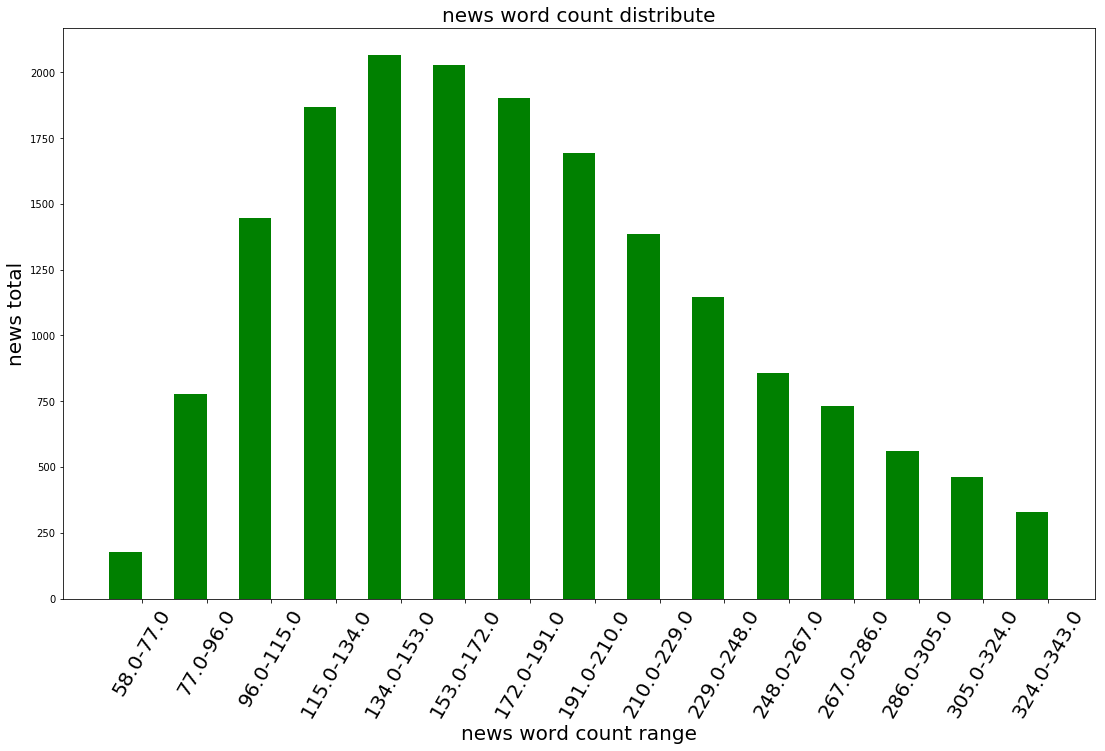

In [10]:

#统计单词数量区间文档个数的分布情况

interval = max_count - min_count
count = 15
units = int(interval/count) + 1
x = []
y = []


for i in range(count):
    start = units * i + min_count
    end = min_count + units * (i + 1)
    x.append(str(start) + "-" + str(end))
    y.append(len(filter_data[(filter_data.wordCount >= start) & (filter_data.wordCount < end)]))

#统计新闻单词数
def statisticDocWordCount(x,y):
    barwidth = 0.5  
    xVal = np.arange(len(x))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xlabel("news word count range",fontsize=20)
    plt.ylabel("news total" ,fontsize=20)
    plt.title("news word count distribute" ,fontsize=20)
    plt.xticks(xVal+barwidth/2.0,x,rotation=60,fontsize=20)
    plt.bar(xVal,y,width=barwidth,color='g')
    plt.show()



statisticDocWordCount(x,y)

In [11]:
#将数据打乱顺序，将数据70%作为训练数据，30%作为测试数据，将训练数据训练建立词库
from sklearn.utils import shuffle 
filter_data = shuffle(filter_data) 
filter_data.head(10)


,docs,wordCount,words
18627,data/talk.politics.misc/178746,335,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
1106,data/comp.graphics/38267,144,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
11380,data/sci.crypt/15525,304,"[newsgroups, sci, crypt, path, cantaloupe, srv..."
6282,data/misc.forsale/76009,136,"[xref, cantaloupe, srv, cs, cmu, edu, misc, wr..."
6381,data/misc.forsale/76109,241,"[xref, cantaloupe, srv, cs, cmu, edu, misc, fo..."
5759,data/comp.windows.x/67554,120,"[xref, cantaloupe, srv, cs, cmu, edu, comp, wi..."
16893,data/talk.politics.guns/55089,284,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
6694,data/misc.forsale/76454,131,"[xref, cantaloupe, srv, cs, cmu, edu, alt, mus..."
1243,data/comp.graphics/38404,152,"[xref, cantaloupe, srv, cs, cmu, edu, alt, bin..."
1437,data/comp.graphics/38599,193,"[xref, cantaloupe, srv, cs, cmu, edu, alt, bin..."


In [12]:
#将数据划分成训练集和测试集
train_size = 0.7
train_sum = int(len(filter_data) * train_size)
data_train = filter_data[:train_sum]
data_test = filter_data[train_sum:]


In [13]:
data_train.head(10)

,docs,wordCount,words
18627,data/talk.politics.misc/178746,335,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
1106,data/comp.graphics/38267,144,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
11380,data/sci.crypt/15525,304,"[newsgroups, sci, crypt, path, cantaloupe, srv..."
6282,data/misc.forsale/76009,136,"[xref, cantaloupe, srv, cs, cmu, edu, misc, wr..."
6381,data/misc.forsale/76109,241,"[xref, cantaloupe, srv, cs, cmu, edu, misc, fo..."
5759,data/comp.windows.x/67554,120,"[xref, cantaloupe, srv, cs, cmu, edu, comp, wi..."
16893,data/talk.politics.guns/55089,284,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
6694,data/misc.forsale/76454,131,"[xref, cantaloupe, srv, cs, cmu, edu, alt, mus..."
1243,data/comp.graphics/38404,152,"[xref, cantaloupe, srv, cs, cmu, edu, alt, bin..."
1437,data/comp.graphics/38599,193,"[xref, cantaloupe, srv, cs, cmu, edu, alt, bin..."


In [14]:
data_test.head(10)

,docs,wordCount,words
10269,data/rec.sport.hockey/53669,277,"[path, cantaloupe, srv, cs, cmu, edu, das, new..."
10970,data/rec.sport.hockey/54755,240,"[path, cantaloupe, srv, cs, cmu, edu, rocheste..."
8441,data/rec.motorcycles/104591,288,"[newsgroups, rec, motorcycles, path, cantaloup..."
10834,data/rec.sport.hockey/54288,211,"[newsgroups, rec, sport, hockey, path, cantalo..."
1730,data/comp.graphics/38892,86,"[newsgroups, comp, graphics, path, cantaloupe,..."
8660,data/rec.motorcycles/104810,238,"[path, cantaloupe, srv, cs, cmu, edu, rocheste..."
11406,data/sci.crypt/15551,121,"[xref, cantaloupe, srv, cs, cmu, edu, sci, cry..."
18662,data/talk.politics.misc/178781,336,"[xref, cantaloupe, srv, cs, cmu, edu, alt, act..."
13553,data/sci.med/59193,170,"[xref, cantaloupe, srv, cs, cmu, edu, sci, ene..."
3526,data/comp.sys.ibm.pc.hardware/60693,118,"[newsgroups, comp, sys, ibm, pc, hardware, pat..."


In [15]:
data_train_word = data_train["words"]
data_train_word.head(10)

18627    [xref, cantaloupe, srv, cs, cmu, edu, talk, po...
1106     [path, cantaloupe, srv, cs, cmu, edu, crabappl...
11380    [newsgroups, sci, crypt, path, cantaloupe, srv...
6282     [xref, cantaloupe, srv, cs, cmu, edu, misc, wr...
6381     [xref, cantaloupe, srv, cs, cmu, edu, misc, fo...
5759     [xref, cantaloupe, srv, cs, cmu, edu, comp, wi...
16893    [xref, cantaloupe, srv, cs, cmu, edu, talk, po...
6694     [xref, cantaloupe, srv, cs, cmu, edu, alt, mus...
1243     [xref, cantaloupe, srv, cs, cmu, edu, alt, bin...
1437     [xref, cantaloupe, srv, cs, cmu, edu, alt, bin...
Name: words, dtype: object

In [16]:
#设置日志级别
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

In [17]:
#sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
#hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（defau·t），则negative sampling会被使用。

#基准模型 使用word2vec训练词向量 使用Negative sampling CBOW  测试准确率：85%
# base_model = gensim.models.Word2Vec(sentences=data_train_word,window=5,min_count=2,workers=multiprocessing.cpu_count(),size=300,sg=0,hs=0)

#基准模型 使用word2vec训练词向量 使用Negative sampling skip-gram 测试准确率：84.7%
#base_model = gensim.models.Word2Vec(sentences=data_train_word,window=5,min_count=2,workers=multiprocessing.cpu_count(),size=300,sg=1,hs=0)

#基准模型 使用word2vec训练词向量 使用hierarchica·softmax    CBOW 测试准确率：88.7%
# base_model = gensim.models.Word2Vec(sentences=data_train_word,window=5,min_count=2,workers=multiprocessing.cpu_count(),size=300,sg=0,hs =1)

#基准模型 使用word2vec训练词向量 使用hierarchica·softmax    skip-gram 测试准确率：90.2%
base_model = gensim.models.Word2Vec(sentences=data_train_word,window=5,min_count=2,workers=multiprocessing.cpu_count(),size=300,sg=1,hs =1)

2017-07-13 20:10:15,396: INFO: collecting all words and their counts
2017-07-13 20:10:15,398: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-07-13 20:10:15,839: INFO: PROGRESS: at sentence #10000, processed 1829032 words, keeping 62472 word types
2017-07-13 20:10:15,933: INFO: collected 67860 word types from a corpus of 2228257 raw words and 12203 sentences
2017-07-13 20:10:15,934: INFO: Loading a fresh vocabulary
2017-07-13 20:10:16,049: INFO: min_count=2 retains 45564 unique words (67% of original 67860, drops 22296)
2017-07-13 20:10:16,050: INFO: min_count=2 leaves 2205961 word corpus (98% of original 2228257, drops 22296)
2017-07-13 20:10:16,198: INFO: deleting the raw counts dictionary of 67860 items
2017-07-13 20:10:16,203: INFO: sample=0.001 downsamples 38 most-common words
2017-07-13 20:10:16,204: INFO: downsampling leaves estimated 1936584 word corpus (87.8% of prior 2205961)
2017-07-13 20:10:16,205: INFO: estimated required memory for 45564 words

2017-07-13 20:11:27,384: INFO: worker thread finished; awaiting finish of 5 more threads
2017-07-13 20:11:27,446: INFO: worker thread finished; awaiting finish of 4 more threads
2017-07-13 20:11:27,454: INFO: worker thread finished; awaiting finish of 3 more threads
2017-07-13 20:11:27,488: INFO: worker thread finished; awaiting finish of 2 more threads
2017-07-13 20:11:27,536: INFO: worker thread finished; awaiting finish of 1 more threads
2017-07-13 20:11:27,561: INFO: worker thread finished; awaiting finish of 0 more threads
2017-07-13 20:11:27,562: INFO: training on 11141285 raw words (9681960 effective words) took 69.0s, 140267 effective words/s


In [18]:
all_labels = []

#以下是获取文档向量的三种方法：1.将所有单词词向量进行叠加求平均 2.使用词频最高的wordCount个单词的词向量进行叠加求平均
#3.使用词频最高的wordCount个单词的词向量，如果词频对数>1 则词向量*词频的对数 否则不加权，进行叠加再求平均

#得到文档向量 词向量叠加取平均
# def getDocVector(words,model):
#     vectors = []
#     count = 0
#     for key in words:
#         try:
#             vector = model[key]
#             if len(vectors) == 0:
#                 vectors = vector
#             else:
#                 vectors = np.add(vector, vectors)
#             count += 1
#         except:
# #             print(key[0],"===============")
#             pass
#     return  np.divide(vectors, count)

# #增加词频

# def getDocVector(words,model,word_count):
#     counter = Counter(words)
#     vectors = []
#     count = 0
#     for key in counter.most_common(word_count):
#         try:
#             vector = model[key[0]]
#             if len(vectors) == 0:
#                 vectors = vector
#             else:
#                 vectors = np.add(vector, vectors)
#             count += 1
#         except:
# #             print(key[0],"===============")
#             pass
#     return  np.divide(vectors, count)

#对词频进行加权，乘以词频的对数
def getDocVector(words,model,word_count):
    counter = Counter(words)
    vectors = []
    count = 0
    for key in counter.most_common(word_count):
        try:
            if np.log(key[1]) > 1:
                vector = model[key[0]]*(np.log(key[1]))
            else:
                vector = model[key[0]]
            if len(vectors) == 0:
                vectors = vector
            else:
                vectors = np.add(vector, vectors)
            count += 1
        except:
#             print(key[0],"===============")
            pass
    return  np.divide(vectors, count)


def getData(dataFrame,model,word_count):
    if model is None:
        print("please download model file")
        return
    
    x = []
    y = []
    for key in dataFrame.iterrows():
        vector = getDocVector(key[1]["words"],model,word_count)
        doc = key[1]["docs"]
        label = doc.split("/")[-2]
        if label not in all_labels:
            all_labels.append(label)
        value = []
        value.append(all_labels.index(label))
        y.append(value)
        x.append(vector) 
    enc = OneHotEncoder()
    enc.fit(y)
    y = enc.transform(y).toarray()
    return x,y




        



In [ ]:
import numpy as np
from keras import optimizers
from keras.layers import Dense, Dropout, regularizers
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

keep_pro = 0.2
learning_rate = 0.03
epochs = 5000
batch_size = 1024
#创建神经网络模型
model = Sequential()
#创建输入层
model.add(Dense(100, input_dim=300,activation="relu"))
#创建Dropout层防止过拟合
model.add(Dropout(keep_pro))
#创建隐藏层
model.add(Dense(200, activation="relu"))
#创建Dropout层防止过拟合
model.add(Dropout(keep_pro))
#创建隐藏层
model.add(Dense(300, activation="relu"))
#创建Dropout层防止过拟合
model.add(Dropout(keep_pro))
#创建输出层
model.add(Dense(20, activation="softmax"))
#创建优化器
sgd = optimizers.SGD(lr=learning_rate)
#训练模型 使用keras的回调函数提前终止
callback_loss = EarlyStopping(monitor="val_loss",patience=100,mode="min")
callback_accuracy = EarlyStopping(monitor="val_acc",patience=100,mode="max")
#训练模型
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

word_count_list=[120,130,140,150,160,170,180,190,200,210]
test_accuracy = []
test_loss = []
for wordCount in word_count_list:
    x_train,y_train = getData(data_train,base_model,wordCount)
    x_test,y_test = getData(data_test,base_model,wordCount)
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=[callback_loss,callback_accuracy])
    #输出训练集和验证集准确率的图像
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy wordCount:'+ str(wordCount))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    #输出训练集和验证集loss的图像
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss wordCount:' + str(wordCount))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    loss, accuracy = model.evaluate(x_test, y_test)
    test_accuracy.append(accuracy)
    test_loss.append(loss)
    model.save(str(wordCount) + "_model.h5")
    
    print("word count:",wordCount," finish .............")
    

Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 2s - loss: 2.9975 - acc: 0.0597 - val_loss: 2.9939 - val_acc: 0.0717
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 2.9958 - acc: 0.0653 - val_loss: 2.9923 - val_acc: 0.0819
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9937 - acc: 0.0636 - val_loss: 2.9909 - val_acc: 0.0873
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9925 - acc: 0.0659 - val_loss: 2.9894 - val_acc: 0.0901
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9913 - acc: 0.0666 - val_loss: 2.9880 - val_acc: 0.0930
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9902 - acc: 0.0661 - val_loss: 2.9866 - val_acc: 0.0914
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9879 - acc: 0.0707 - val_loss: 2.9853 - val_acc: 0.0922
Epoch 8/5000
9762/9762 [==============================] - 0s - 

9762/9762 [==============================] - 0s - loss: 2.7648 - acc: 0.1975 - val_loss: 2.7339 - val_acc: 0.2937
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.7555 - acc: 0.1914 - val_loss: 2.7194 - val_acc: 0.2921
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.7415 - acc: 0.1942 - val_loss: 2.7042 - val_acc: 0.2950
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.7264 - acc: 0.1957 - val_loss: 2.6886 - val_acc: 0.2941
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.7122 - acc: 0.2040 - val_loss: 2.6723 - val_acc: 0.2958
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.6951 - acc: 0.2056 - val_loss: 2.6553 - val_acc: 0.2986
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.6813 - acc: 0.2075 - val_loss: 2.6379 - val_acc: 0.3015
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.6630 - acc: 0.2123 - val_loss: 2.6201 - val_ac

9762/9762 [==============================] - 0s - loss: 1.8543 - acc: 0.3483 - val_loss: 1.7218 - val_acc: 0.5068
Epoch 128/5000
9762/9762 [==============================] - 0s - loss: 1.8394 - acc: 0.3544 - val_loss: 1.7103 - val_acc: 0.4953
Epoch 129/5000
9762/9762 [==============================] - 0s - loss: 1.8423 - acc: 0.3512 - val_loss: 1.7011 - val_acc: 0.4986
Epoch 130/5000
9762/9762 [==============================] - 0s - loss: 1.8293 - acc: 0.3605 - val_loss: 1.6873 - val_acc: 0.5072
Epoch 131/5000
9762/9762 [==============================] - 0s - loss: 1.8118 - acc: 0.3693 - val_loss: 1.6765 - val_acc: 0.5121
Epoch 132/5000
9762/9762 [==============================] - 0s - loss: 1.7967 - acc: 0.3661 - val_loss: 1.6657 - val_acc: 0.5092
Epoch 133/5000
9762/9762 [==============================] - 0s - loss: 1.7913 - acc: 0.3717 - val_loss: 1.6544 - val_acc: 0.5190
Epoch 134/5000
9762/9762 [==============================] - 0s - loss: 1.7777 - acc: 0.3717 - val_loss: 1.6427 -

9762/9762 [==============================] - 0s - loss: 1.3277 - acc: 0.5074 - val_loss: 1.1873 - val_acc: 0.6276
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 1.3247 - acc: 0.5085 - val_loss: 1.1805 - val_acc: 0.6223
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 1.3223 - acc: 0.5042 - val_loss: 1.1745 - val_acc: 0.6268
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 1.3112 - acc: 0.5055 - val_loss: 1.1710 - val_acc: 0.6223
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 1.3150 - acc: 0.5083 - val_loss: 1.1625 - val_acc: 0.6235
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 1.3107 - acc: 0.5150 - val_loss: 1.1587 - val_acc: 0.6247
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 1.2992 - acc: 0.5193 - val_loss: 1.1510 - val_acc: 0.6297
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 1.3004 - acc: 0.5184 - val_loss: 1.1444 -

In [ ]:
test_accuracy

In [21]:
test_loss

[0.24680926447616708,
 0.23566778021122028,
 0.22945073928192514,
 0.22180775562105398,
 0.2184784940762684,
 0.21884496071541515,
 0.21887465912713375,
 0.21409309590466846,
 0.2137902508103369,
 0.21535492769618791]

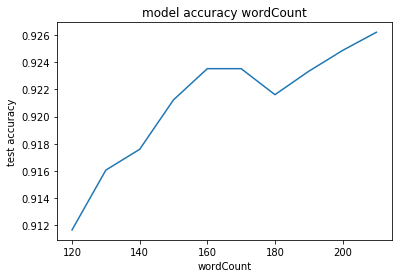

In [22]:
plt.plot(word_count_list,test_accuracy)
plt.title('model accuracy wordCount')
plt.ylabel('test accuracy')
plt.xlabel('wordCount')
plt.show()


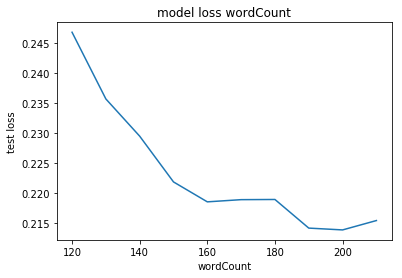

In [23]:
plt.plot(word_count_list,test_loss)
plt.title('model loss wordCount')
plt.ylabel('test loss')
plt.xlabel('wordCount')
plt.show()


Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 1s - loss: 2.9955 - acc: 0.0554 - val_loss: 2.9937 - val_acc: 0.0725
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 2.9942 - acc: 0.0580 - val_loss: 2.9924 - val_acc: 0.0705
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9927 - acc: 0.0577 - val_loss: 2.9913 - val_acc: 0.0635
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9913 - acc: 0.0585 - val_loss: 2.9901 - val_acc: 0.0610
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9902 - acc: 0.0600 - val_loss: 2.9890 - val_acc: 0.0578
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9893 - acc: 0.0605 - val_loss: 2.9880 - val_acc: 0.0590
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9884 - acc: 0.0613 - val_loss: 2.9870 - val_acc: 0.0557
Epoch 8/5000
9762/9762 [==============================] - 0s - 

9762/9762 [==============================] - 0s - loss: 1.9843 - acc: 0.3236 - val_loss: 1.9143 - val_acc: 0.4211
Epoch 128/5000
9762/9762 [==============================] - 0s - loss: 1.9714 - acc: 0.3234 - val_loss: 1.9027 - val_acc: 0.4306
Epoch 129/5000
9762/9762 [==============================] - 0s - loss: 1.9664 - acc: 0.3217 - val_loss: 1.8920 - val_acc: 0.4191
Epoch 130/5000
9762/9762 [==============================] - 0s - loss: 1.9580 - acc: 0.3222 - val_loss: 1.8822 - val_acc: 0.4232
Epoch 131/5000
9762/9762 [==============================] - 0s - loss: 1.9427 - acc: 0.3288 - val_loss: 1.8717 - val_acc: 0.4445
Epoch 132/5000
9762/9762 [==============================] - 0s - loss: 1.9374 - acc: 0.3294 - val_loss: 1.8618 - val_acc: 0.4510
Epoch 133/5000
9762/9762 [==============================] - 0s - loss: 1.9298 - acc: 0.3315 - val_loss: 1.8523 - val_acc: 0.4342
Epoch 134/5000
9762/9762 [==============================] - 0s - loss: 1.9191 - acc: 0.3356 - val_loss: 1.8407 -

9762/9762 [==============================] - 0s - loss: 1.0182 - acc: 0.6380 - val_loss: 0.8928 - val_acc: 0.7186
Epoch 254/5000
9762/9762 [==============================] - 0s - loss: 1.0076 - acc: 0.6327 - val_loss: 0.8877 - val_acc: 0.7239
Epoch 255/5000
9762/9762 [==============================] - 0s - loss: 1.0085 - acc: 0.6310 - val_loss: 0.8853 - val_acc: 0.7206
Epoch 256/5000
9762/9762 [==============================] - 0s - loss: 1.0090 - acc: 0.6308 - val_loss: 0.8797 - val_acc: 0.7259
Epoch 257/5000
9762/9762 [==============================] - 0s - loss: 1.0005 - acc: 0.6370 - val_loss: 0.8762 - val_acc: 0.7227
Epoch 258/5000
9762/9762 [==============================] - 0s - loss: 0.9920 - acc: 0.6381 - val_loss: 0.8702 - val_acc: 0.7206
Epoch 259/5000
9762/9762 [==============================] - 0s - loss: 0.9972 - acc: 0.6279 - val_loss: 0.8670 - val_acc: 0.7304
Epoch 260/5000
9762/9762 [==============================] - 0s - loss: 0.9811 - acc: 0.6463 - val_loss: 0.8635 -

9762/9762 [==============================] - 0s - loss: 0.6604 - acc: 0.7566 - val_loss: 0.5731 - val_acc: 0.7968
Epoch 380/5000
9762/9762 [==============================] - 0s - loss: 0.6662 - acc: 0.7532 - val_loss: 0.5692 - val_acc: 0.8034
Epoch 381/5000
9762/9762 [==============================] - 0s - loss: 0.6530 - acc: 0.7660 - val_loss: 0.5776 - val_acc: 0.7939
Epoch 382/5000
9762/9762 [==============================] - 0s - loss: 0.6546 - acc: 0.7583 - val_loss: 0.5660 - val_acc: 0.8083
Epoch 383/5000
9762/9762 [==============================] - 0s - loss: 0.6569 - acc: 0.7615 - val_loss: 0.5664 - val_acc: 0.8042
Epoch 384/5000
9762/9762 [==============================] - 0s - loss: 0.6514 - acc: 0.7595 - val_loss: 0.5749 - val_acc: 0.7984
Epoch 385/5000
9762/9762 [==============================] - 0s - loss: 0.6575 - acc: 0.7585 - val_loss: 0.5624 - val_acc: 0.8038
Epoch 386/5000
9762/9762 [==============================] - 0s - loss: 0.6462 - acc: 0.7654 - val_loss: 0.5633 -

9762/9762 [==============================] - 0s - loss: 0.5010 - acc: 0.8185 - val_loss: 0.4399 - val_acc: 0.8451
Epoch 506/5000
9762/9762 [==============================] - 0s - loss: 0.5066 - acc: 0.8161 - val_loss: 0.4388 - val_acc: 0.8447
Epoch 507/5000
9762/9762 [==============================] - 0s - loss: 0.4960 - acc: 0.8217 - val_loss: 0.4409 - val_acc: 0.8456
Epoch 508/5000
9762/9762 [==============================] - 0s - loss: 0.4982 - acc: 0.8222 - val_loss: 0.4403 - val_acc: 0.8460
Epoch 509/5000
9762/9762 [==============================] - 0s - loss: 0.4976 - acc: 0.8197 - val_loss: 0.4383 - val_acc: 0.8480
Epoch 510/5000
9762/9762 [==============================] - 0s - loss: 0.4983 - acc: 0.8165 - val_loss: 0.4427 - val_acc: 0.8423
Epoch 511/5000
9762/9762 [==============================] - 0s - loss: 0.4906 - acc: 0.8221 - val_loss: 0.4397 - val_acc: 0.8423
Epoch 512/5000
9762/9762 [==============================] - 0s - loss: 0.5018 - acc: 0.8204 - val_loss: 0.4352 -

9762/9762 [==============================] - 0s - loss: 0.3993 - acc: 0.8603 - val_loss: 0.3639 - val_acc: 0.8738
Epoch 632/5000
9762/9762 [==============================] - 0s - loss: 0.3970 - acc: 0.8561 - val_loss: 0.3717 - val_acc: 0.8746
Epoch 633/5000
9762/9762 [==============================] - 0s - loss: 0.4009 - acc: 0.8582 - val_loss: 0.3612 - val_acc: 0.8751
Epoch 634/5000
9762/9762 [==============================] - 0s - loss: 0.3965 - acc: 0.8598 - val_loss: 0.3610 - val_acc: 0.8767
Epoch 635/5000
9762/9762 [==============================] - 0s - loss: 0.3998 - acc: 0.8594 - val_loss: 0.3610 - val_acc: 0.87630
Epoch 636/5000
9762/9762 [==============================] - 0s - loss: 0.3968 - acc: 0.8585 - val_loss: 0.3632 - val_acc: 0.8738
Epoch 637/5000
9762/9762 [==============================] - 0s - loss: 0.3986 - acc: 0.8591 - val_loss: 0.3628 - val_acc: 0.8759
Epoch 638/5000
9762/9762 [==============================] - 0s - loss: 0.3930 - acc: 0.8627 - val_loss: 0.3614 

9762/9762 [==============================] - 0s - loss: 0.3334 - acc: 0.8846 - val_loss: 0.3148 - val_acc: 0.8894
Epoch 758/5000
9762/9762 [==============================] - 0s - loss: 0.3352 - acc: 0.8794 - val_loss: 0.3135 - val_acc: 0.8906
Epoch 759/5000
9762/9762 [==============================] - 0s - loss: 0.3281 - acc: 0.8859 - val_loss: 0.3124 - val_acc: 0.8914
Epoch 760/5000
9762/9762 [==============================] - 0s - loss: 0.3296 - acc: 0.8829 - val_loss: 0.3116 - val_acc: 0.8927
Epoch 761/5000
9762/9762 [==============================] - 0s - loss: 0.3321 - acc: 0.8866 - val_loss: 0.3113 - val_acc: 0.8918
Epoch 762/5000
9762/9762 [==============================] - 0s - loss: 0.3286 - acc: 0.8871 - val_loss: 0.3106 - val_acc: 0.8943
Epoch 763/5000
9762/9762 [==============================] - 0s - loss: 0.3274 - acc: 0.8834 - val_loss: 0.3145 - val_acc: 0.8886
Epoch 764/5000
9762/9762 [==============================] - 0s - loss: 0.3293 - acc: 0.8829 - val_loss: 0.3110 -

9762/9762 [==============================] - 0s - loss: 0.2798 - acc: 0.9042 - val_loss: 0.2780 - val_acc: 0.9000
Epoch 884/5000
9762/9762 [==============================] - 0s - loss: 0.2817 - acc: 0.9008 - val_loss: 0.2817 - val_acc: 0.8988
Epoch 885/5000
9762/9762 [==============================] - 0s - loss: 0.2816 - acc: 0.9034 - val_loss: 0.2787 - val_acc: 0.8980
Epoch 886/5000
9762/9762 [==============================] - 0s - loss: 0.2795 - acc: 0.9032 - val_loss: 0.2875 - val_acc: 0.8955
Epoch 887/5000
9762/9762 [==============================] - 0s - loss: 0.2846 - acc: 0.9017 - val_loss: 0.2811 - val_acc: 0.8955
Epoch 888/5000
9762/9762 [==============================] - 0s - loss: 0.2817 - acc: 0.9008 - val_loss: 0.2841 - val_acc: 0.89550.9
Epoch 889/5000
9762/9762 [==============================] - 0s - loss: 0.2856 - acc: 0.9014 - val_loss: 0.2792 - val_acc: 0.8980
Epoch 890/5000
9762/9762 [==============================] - 0s - loss: 0.2760 - acc: 0.9017 - val_loss: 0.279

9762/9762 [==============================] - 0s - loss: 0.2504 - acc: 0.9133 - val_loss: 0.2626 - val_acc: 0.9050
Epoch 1010/5000
9762/9762 [==============================] - 0s - loss: 0.2446 - acc: 0.9162 - val_loss: 0.2579 - val_acc: 0.9058
Epoch 1011/5000
9762/9762 [==============================] - 0s - loss: 0.2464 - acc: 0.9129 - val_loss: 0.2570 - val_acc: 0.9062
Epoch 1012/5000
9762/9762 [==============================] - 0s - loss: 0.2421 - acc: 0.9152 - val_loss: 0.2581 - val_acc: 0.9013
Epoch 1013/5000
9762/9762 [==============================] - 0s - loss: 0.2464 - acc: 0.9126 - val_loss: 0.2555 - val_acc: 0.9062
Epoch 1014/5000
9762/9762 [==============================] - 0s - loss: 0.2485 - acc: 0.9108 - val_loss: 0.2608 - val_acc: 0.9054
Epoch 1015/5000
9762/9762 [==============================] - 0s - loss: 0.2408 - acc: 0.9154 - val_loss: 0.2583 - val_acc: 0.9058
Epoch 1016/5000
9762/9762 [==============================] - 0s - loss: 0.2421 - acc: 0.9142 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2299 - acc: 0.9191 - val_loss: 0.2491 - val_acc: 0.90910.9
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.2314 - acc: 0.9178 - val_loss: 0.2513 - val_acc: 0.9058
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.2307 - acc: 0.9197 - val_loss: 0.2508 - val_acc: 0.9070
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.2317 - acc: 0.9207 - val_loss: 0.2503 - val_acc: 0.9054
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.2295 - acc: 0.9193 - val_loss: 0.2568 - val_acc: 0.9041
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.2283 - acc: 0.9201 - val_loss: 0.2514 - val_acc: 0.9025
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.2281 - acc: 0.9207 - val_loss: 0.2540 - val_acc: 0.9066
Epoch 1079/5000
9762/9762 [==============================] - 0s - loss: 0.2308 - acc: 0.9175 - val_loss

9762/9762 [==============================] - 0s - loss: 0.2208 - acc: 0.9246 - val_loss: 0.2450 - val_acc: 0.9095
Epoch 1136/5000
9762/9762 [==============================] - 0s - loss: 0.2188 - acc: 0.9228 - val_loss: 0.2493 - val_acc: 0.9045
Epoch 1137/5000
9762/9762 [==============================] - 0s - loss: 0.2131 - acc: 0.9244 - val_loss: 0.2423 - val_acc: 0.90860
Epoch 1138/5000
9762/9762 [==============================] - 0s - loss: 0.2189 - acc: 0.9238 - val_loss: 0.2452 - val_acc: 0.9066
Epoch 1139/5000
9762/9762 [==============================] - 0s - loss: 0.2177 - acc: 0.9252 - val_loss: 0.2426 - val_acc: 0.9086
Epoch 1140/5000
9762/9762 [==============================] - 0s - loss: 0.2167 - acc: 0.9248 - val_loss: 0.2467 - val_acc: 0.9070
Epoch 1141/5000
9762/9762 [==============================] - 0s - loss: 0.2164 - acc: 0.9252 - val_loss: 0.2441 - val_acc: 0.9062
Epoch 1142/5000
9762/9762 [==============================] - 0s - loss: 0.2157 - acc: 0.9258 - val_loss: 

9762/9762 [==============================] - 0s - loss: 0.2066 - acc: 0.9253 - val_loss: 0.2399 - val_acc: 0.9107
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.2070 - acc: 0.9264 - val_loss: 0.2401 - val_acc: 0.9111
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.2021 - acc: 0.9309 - val_loss: 0.2387 - val_acc: 0.9086
Epoch 1201/5000
9762/9762 [==============================] - 0s - loss: 0.2054 - acc: 0.9287 - val_loss: 0.2385 - val_acc: 0.9095
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.2056 - acc: 0.9272 - val_loss: 0.2362 - val_acc: 0.9119
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.2061 - acc: 0.9270 - val_loss: 0.2370 - val_acc: 0.9103
Epoch 1204/5000
9762/9762 [==============================] - 0s - loss: 0.2008 - acc: 0.9286 - val_loss: 0.2360 - val_acc: 0.9119
Epoch 1205/5000
9762/9762 [==============================] - 0s - loss: 0.2051 - acc: 0.9271 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1865 - acc: 0.9351 - val_loss: 0.2284 - val_acc: 0.9177
Epoch 1325/5000
9762/9762 [==============================] - 0s - loss: 0.1876 - acc: 0.9343 - val_loss: 0.2332 - val_acc: 0.9086
Epoch 1326/5000
9762/9762 [==============================] - 0s - loss: 0.1845 - acc: 0.9334 - val_loss: 0.2304 - val_acc: 0.9177
Epoch 1327/5000
9762/9762 [==============================] - 0s - loss: 0.1835 - acc: 0.9368 - val_loss: 0.2292 - val_acc: 0.9136
Epoch 1328/5000
9762/9762 [==============================] - 0s - loss: 0.1895 - acc: 0.9360 - val_loss: 0.2343 - val_acc: 0.9086
Epoch 1329/5000
9762/9762 [==============================] - 0s - loss: 0.1837 - acc: 0.9343 - val_loss: 0.2289 - val_acc: 0.9136
Epoch 1330/5000
9762/9762 [==============================] - 0s - loss: 0.1871 - acc: 0.9362 - val_loss: 0.2286 - val_acc: 0.9144
Epoch 1331/5000
9762/9762 [==============================] - 0s - loss: 0.1832 - acc: 0.9351 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1763 - acc: 0.9385 - val_loss: 0.2320 - val_acc: 0.9082
Epoch 1388/5000
9762/9762 [==============================] - 0s - loss: 0.1737 - acc: 0.9397 - val_loss: 0.2259 - val_acc: 0.9160
Epoch 1389/5000
9762/9762 [==============================] - 0s - loss: 0.1778 - acc: 0.9368 - val_loss: 0.2259 - val_acc: 0.9127
Epoch 1390/5000
9762/9762 [==============================] - 0s - loss: 0.1764 - acc: 0.9374 - val_loss: 0.2242 - val_acc: 0.9136
Epoch 1391/5000
9762/9762 [==============================] - 0s - loss: 0.1764 - acc: 0.9353 - val_loss: 0.2292 - val_acc: 0.9132
Epoch 1392/5000
9762/9762 [==============================] - 0s - loss: 0.1791 - acc: 0.9344 - val_loss: 0.2266 - val_acc: 0.91770.933
Epoch 1393/5000
9762/9762 [==============================] - 0s - loss: 0.1725 - acc: 0.9371 - val_loss: 0.2256 - val_acc: 0.91440
Epoch 1394/5000
9762/9762 [==============================] - 0s - loss: 0.1748 - acc: 0.9365 - val_l

9762/9762 [==============================] - 0s - loss: 0.1662 - acc: 0.9407 - val_loss: 0.2208 - val_acc: 0.9177
Epoch 1451/5000
9762/9762 [==============================] - 0s - loss: 0.1732 - acc: 0.9389 - val_loss: 0.2251 - val_acc: 0.9127
Epoch 1452/5000
9762/9762 [==============================] - 0s - loss: 0.1669 - acc: 0.9400 - val_loss: 0.2237 - val_acc: 0.9172
Epoch 1453/5000
9762/9762 [==============================] - 0s - loss: 0.1723 - acc: 0.9366 - val_loss: 0.2222 - val_acc: 0.9193
Epoch 1454/5000
9762/9762 [==============================] - 0s - loss: 0.1663 - acc: 0.9414 - val_loss: 0.2245 - val_acc: 0.9164
Epoch 1455/5000
9762/9762 [==============================] - 0s - loss: 0.1743 - acc: 0.9393 - val_loss: 0.2227 - val_acc: 0.9168
Epoch 1456/5000
9762/9762 [==============================] - 0s - loss: 0.1672 - acc: 0.9403 - val_loss: 0.2311 - val_acc: 0.9132
Epoch 1457/5000
9762/9762 [==============================] - 0s - loss: 0.1726 - acc: 0.9388 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1593 - acc: 0.9419 - val_loss: 0.2208 - val_acc: 0.9160
Epoch 1514/5000
9762/9762 [==============================] - 0s - loss: 0.1627 - acc: 0.9423 - val_loss: 0.2213 - val_acc: 0.9193
Epoch 1515/5000
9762/9762 [==============================] - 0s - loss: 0.1620 - acc: 0.9430 - val_loss: 0.2212 - val_acc: 0.9172
Epoch 1516/5000
9762/9762 [==============================] - 0s - loss: 0.1616 - acc: 0.9423 - val_loss: 0.2232 - val_acc: 0.9156
Epoch 1517/5000
9762/9762 [==============================] - 0s - loss: 0.1616 - acc: 0.9430 - val_loss: 0.2215 - val_acc: 0.9152
Epoch 1518/5000
9762/9762 [==============================] - 0s - loss: 0.1558 - acc: 0.9434 - val_loss: 0.2190 - val_acc: 0.9201
Epoch 1519/5000
9762/9762 [==============================] - 0s - loss: 0.1631 - acc: 0.9454 - val_loss: 0.2235 - val_acc: 0.9164
Epoch 1520/5000
9762/9762 [==============================] - 0s - loss: 0.1611 - acc: 0.9448 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1573 - acc: 0.9435 - val_loss: 0.2179 - val_acc: 0.9193
Epoch 1577/5000
9762/9762 [==============================] - 0s - loss: 0.1570 - acc: 0.9458 - val_loss: 0.2182 - val_acc: 0.9185
Epoch 1578/5000
9762/9762 [==============================] - 0s - loss: 0.1534 - acc: 0.9449 - val_loss: 0.2192 - val_acc: 0.9181
Epoch 1579/5000
9762/9762 [==============================] - 0s - loss: 0.1579 - acc: 0.9439 - val_loss: 0.2167 - val_acc: 0.9177
Epoch 1580/5000
9762/9762 [==============================] - 0s - loss: 0.1571 - acc: 0.9462 - val_loss: 0.2191 - val_acc: 0.9168
Epoch 1581/5000
9762/9762 [==============================] - 0s - loss: 0.1555 - acc: 0.9456 - val_loss: 0.2230 - val_acc: 0.9144
Epoch 1582/5000
9762/9762 [==============================] - 0s - loss: 0.1532 - acc: 0.9472 - val_loss: 0.2236 - val_acc: 0.9156
Epoch 1583/5000
9762/9762 [==============================] - 0s - loss: 0.1537 - acc: 0.9438 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1472 - acc: 0.9478 - val_loss: 0.2142 - val_acc: 0.9218
Epoch 1703/5000
9762/9762 [==============================] - 0s - loss: 0.1465 - acc: 0.9483 - val_loss: 0.2173 - val_acc: 0.9189
Epoch 1704/5000
9762/9762 [==============================] - 0s - loss: 0.1448 - acc: 0.9479 - val_loss: 0.2156 - val_acc: 0.9209
Epoch 1705/5000
9762/9762 [==============================] - 0s - loss: 0.1416 - acc: 0.9507 - val_loss: 0.2147 - val_acc: 0.9209
Epoch 1706/5000
9762/9762 [==============================] - 0s - loss: 0.1447 - acc: 0.9477 - val_loss: 0.2146 - val_acc: 0.9181
Epoch 1707/5000
9762/9762 [==============================] - 0s - loss: 0.1427 - acc: 0.9489 - val_loss: 0.2162 - val_acc: 0.9201
Epoch 1708/5000
9762/9762 [==============================] - 0s - loss: 0.1443 - acc: 0.9492 - val_loss: 0.2161 - val_acc: 0.9197
Epoch 1709/5000
9762/9762 [==============================] - 0s - loss: 0.1412 - acc: 0.9498 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1393 - acc: 0.9490 - val_loss: 0.2178 - val_acc: 0.9168
Epoch 1766/5000
9762/9762 [==============================] - 0s - loss: 0.1383 - acc: 0.9516 - val_loss: 0.2179 - val_acc: 0.9185
Epoch 1767/5000
9762/9762 [==============================] - 0s - loss: 0.1396 - acc: 0.9491 - val_loss: 0.2163 - val_acc: 0.9156
Epoch 1768/5000
9762/9762 [==============================] - 0s - loss: 0.1342 - acc: 0.9513 - val_loss: 0.2183 - val_acc: 0.9201
Epoch 1769/5000
9762/9762 [==============================] - 0s - loss: 0.1431 - acc: 0.9492 - val_loss: 0.2150 - val_acc: 0.9164
Epoch 1770/5000
9762/9762 [==============================] - 0s - loss: 0.1373 - acc: 0.9518 - val_loss: 0.2147 - val_acc: 0.9213
Epoch 1771/5000
9762/9762 [==============================] - 0s - loss: 0.1386 - acc: 0.9506 - val_loss: 0.2184 - val_acc: 0.9209
Epoch 1772/5000
9762/9762 [==============================] - 0s - loss: 0.1380 - acc: 0.9501 - val_loss: 0

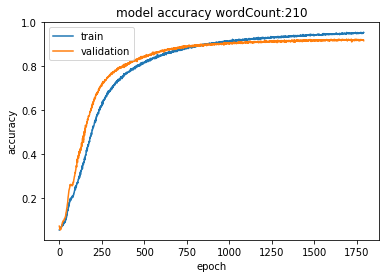

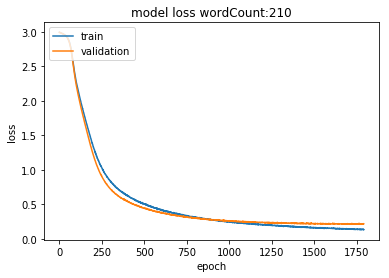

4736/5230 [==========================>...] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.0001 - acc: 0.0484 - val_loss: 2.9976 - val_acc: 0.0545
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 2.9986 - acc: 0.0522 - val_loss: 2.9964 - val_acc: 0.0553
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9976 - acc: 0.0491 - val_loss: 2.9952 - val_acc: 0.0545
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9959 - acc: 0.0574 - val_loss: 2.9942 - val_acc: 0.0524
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9946 - acc: 0.0579 - val_loss: 2.9932 - val_acc: 0.0533
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9939 - acc: 0.0588 - val_loss: 2.9921 - val_acc: 0.0528
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9935 - acc: 0.0608 - val_loss

9762/9762 [==============================] - 0s - loss: 2.8980 - acc: 0.1126 - val_loss: 2.8892 - val_acc: 0.1483
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.8917 - acc: 0.1112 - val_loss: 2.8840 - val_acc: 0.1479
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.8881 - acc: 0.1178 - val_loss: 2.8785 - val_acc: 0.1524
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.8813 - acc: 0.1215 - val_loss: 2.8726 - val_acc: 0.1536
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.8769 - acc: 0.1199 - val_loss: 2.8666 - val_acc: 0.1544
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.8720 - acc: 0.1224 - val_loss: 2.8603 - val_acc: 0.1585
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.8643 - acc: 0.1278 - val_loss: 2.8534 - val_acc: 0.1651
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.8598 - acc: 0.1323 - val_loss: 2.8462 - val_ac

9762/9762 [==============================] - 0s - loss: 1.5443 - acc: 0.4290 - val_loss: 1.3781 - val_acc: 0.5801
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 1.5290 - acc: 0.4422 - val_loss: 1.3707 - val_acc: 0.5776
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 1.5333 - acc: 0.4359 - val_loss: 1.3663 - val_acc: 0.5764
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 1.5202 - acc: 0.4474 - val_loss: 1.3532 - val_acc: 0.5866
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 1.5171 - acc: 0.4419 - val_loss: 1.3453 - val_acc: 0.5883
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 1.5048 - acc: 0.4487 - val_loss: 1.3400 - val_acc: 0.5813
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 1.4992 - acc: 0.4516 - val_loss: 1.3320 - val_acc: 0.5871
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 1.4835 - acc: 0.4577 - val_loss: 1.3227 -

9762/9762 [==============================] - 0s - loss: 0.9348 - acc: 0.6473 - val_loss: 0.7713 - val_acc: 0.7493
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 0.9281 - acc: 0.6485 - val_loss: 0.7671 - val_acc: 0.7526
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 0.9235 - acc: 0.6528 - val_loss: 0.7609 - val_acc: 0.7571
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 0.9219 - acc: 0.6573 - val_loss: 0.7583 - val_acc: 0.7620
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 0.9242 - acc: 0.6490 - val_loss: 0.7588 - val_acc: 0.7546
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 0.9149 - acc: 0.6552 - val_loss: 0.7540 - val_acc: 0.7530
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 0.9169 - acc: 0.6517 - val_loss: 0.7525 - val_acc: 0.7534
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 0.9037 - acc: 0.6587 - val_loss: 0.7512 -

9762/9762 [==============================] - 0s - loss: 0.6651 - acc: 0.7482 - val_loss: 0.5317 - val_acc: 0.8214
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 0.6469 - acc: 0.7616 - val_loss: 0.5300 - val_acc: 0.8238
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 0.6596 - acc: 0.7528 - val_loss: 0.5270 - val_acc: 0.8251
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 0.6542 - acc: 0.7567 - val_loss: 0.5300 - val_acc: 0.8189
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 0.6545 - acc: 0.7575 - val_loss: 0.5272 - val_acc: 0.8243
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 0.6435 - acc: 0.7636 - val_loss: 0.5261 - val_acc: 0.8222
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 0.6364 - acc: 0.7672 - val_loss: 0.5217 - val_acc: 0.8263
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 0.6461 - acc: 0.7617 - val_loss: 0.5244 -

9762/9762 [==============================] - 0s - loss: 0.5178 - acc: 0.8114 - val_loss: 0.4250 - val_acc: 0.8533
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 0.5116 - acc: 0.8143 - val_loss: 0.4230 - val_acc: 0.8529
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 0.5076 - acc: 0.8164 - val_loss: 0.4294 - val_acc: 0.8529
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 0.5127 - acc: 0.8117 - val_loss: 0.4230 - val_acc: 0.8570
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 0.5124 - acc: 0.8161 - val_loss: 0.4256 - val_acc: 0.8521
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 0.5164 - acc: 0.8127 - val_loss: 0.4223 - val_acc: 0.8546
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 0.5037 - acc: 0.8187 - val_loss: 0.4207 - val_acc: 0.8558
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 0.5150 - acc: 0.8136 - val_loss: 0.4228 -

9762/9762 [==============================] - 0s - loss: 0.4329 - acc: 0.8461 - val_loss: 0.3665 - val_acc: 0.8689
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 0.4273 - acc: 0.8464 - val_loss: 0.3692 - val_acc: 0.8726
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 0.4268 - acc: 0.8449 - val_loss: 0.3653 - val_acc: 0.8734
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 0.4257 - acc: 0.8452 - val_loss: 0.3657 - val_acc: 0.8759
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 0.4228 - acc: 0.8528 - val_loss: 0.3664 - val_acc: 0.8652
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 0.4308 - acc: 0.8447 - val_loss: 0.3661 - val_acc: 0.8742
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 0.4209 - acc: 0.8499 - val_loss: 0.3641 - val_acc: 0.8689
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 0.4230 - acc: 0.8492 - val_loss: 0.3636 -

9762/9762 [==============================] - 0s - loss: 0.3657 - acc: 0.8687 - val_loss: 0.3280 - val_acc: 0.8849
Epoch 821/5000
9762/9762 [==============================] - 0s - loss: 0.3605 - acc: 0.8708 - val_loss: 0.3274 - val_acc: 0.8841
Epoch 822/5000
9762/9762 [==============================] - 0s - loss: 0.3612 - acc: 0.8703 - val_loss: 0.3267 - val_acc: 0.8853
Epoch 823/5000
9762/9762 [==============================] - 0s - loss: 0.3696 - acc: 0.8692 - val_loss: 0.3258 - val_acc: 0.8869
Epoch 824/5000
9762/9762 [==============================] - 0s - loss: 0.3636 - acc: 0.8731 - val_loss: 0.3256 - val_acc: 0.8812
Epoch 825/5000
9762/9762 [==============================] - 0s - loss: 0.3631 - acc: 0.8716 - val_loss: 0.3247 - val_acc: 0.8878
Epoch 826/5000
9762/9762 [==============================] - 0s - loss: 0.3602 - acc: 0.8689 - val_loss: 0.3237 - val_acc: 0.8857
Epoch 827/5000
9762/9762 [==============================] - 0s - loss: 0.3741 - acc: 0.8664 - val_loss: 0.3244 -

9762/9762 [==============================] - 0s - loss: 0.3213 - acc: 0.8854 - val_loss: 0.2972 - val_acc: 0.8927
Epoch 947/5000
9762/9762 [==============================] - 0s - loss: 0.3226 - acc: 0.8847 - val_loss: 0.2985 - val_acc: 0.8914
Epoch 948/5000
9762/9762 [==============================] - 0s - loss: 0.3204 - acc: 0.8900 - val_loss: 0.3048 - val_acc: 0.8955
Epoch 949/5000
9762/9762 [==============================] - 0s - loss: 0.3169 - acc: 0.8913 - val_loss: 0.2987 - val_acc: 0.8914
Epoch 950/5000
9762/9762 [==============================] - 0s - loss: 0.3234 - acc: 0.8895 - val_loss: 0.2998 - val_acc: 0.8906
Epoch 951/5000
9762/9762 [==============================] - 0s - loss: 0.3206 - acc: 0.8893 - val_loss: 0.2974 - val_acc: 0.8914
Epoch 952/5000
9762/9762 [==============================] - 0s - loss: 0.3151 - acc: 0.8901 - val_loss: 0.2955 - val_acc: 0.8931
Epoch 953/5000
9762/9762 [==============================] - 0s - loss: 0.3200 - acc: 0.8852 - val_loss: 0.2978 -

9762/9762 [==============================] - 0s - loss: 0.2808 - acc: 0.9011 - val_loss: 0.2796 - val_acc: 0.8976
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.2823 - acc: 0.8999 - val_loss: 0.2818 - val_acc: 0.8959
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.2847 - acc: 0.8992 - val_loss: 0.2782 - val_acc: 0.8984
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.2810 - acc: 0.9059 - val_loss: 0.2768 - val_acc: 0.8980
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.2801 - acc: 0.9018 - val_loss: 0.2791 - val_acc: 0.8968
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.2803 - acc: 0.9042 - val_loss: 0.2761 - val_acc: 0.8984
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.2767 - acc: 0.9035 - val_loss: 0.2796 - val_acc: 0.8964
Epoch 1079/5000
9762/9762 [==============================] - 0s - loss: 0.2823 - acc: 0.8985 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2564 - acc: 0.9108 - val_loss: 0.2657 - val_acc: 0.9005
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.2584 - acc: 0.9096 - val_loss: 0.2630 - val_acc: 0.9041
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.2472 - acc: 0.9141 - val_loss: 0.2599 - val_acc: 0.9070
Epoch 1201/5000
9762/9762 [==============================] - 0s - loss: 0.2592 - acc: 0.9095 - val_loss: 0.2632 - val_acc: 0.9050
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.2532 - acc: 0.9078 - val_loss: 0.2619 - val_acc: 0.9029
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.2526 - acc: 0.9089 - val_loss: 0.2658 - val_acc: 0.8992
Epoch 1204/5000
9762/9762 [==============================] - 0s - loss: 0.2540 - acc: 0.9085 - val_loss: 0.2639 - val_acc: 0.9029
Epoch 1205/5000
9762/9762 [==============================] - 0s - loss: 0.2583 - acc: 0.9074 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2272 - acc: 0.9210 - val_loss: 0.2530 - val_acc: 0.9095
Epoch 1325/5000
9762/9762 [==============================] - 0s - loss: 0.2318 - acc: 0.9189 - val_loss: 0.2498 - val_acc: 0.9062
Epoch 1326/5000
9762/9762 [==============================] - 0s - loss: 0.2216 - acc: 0.9239 - val_loss: 0.2492 - val_acc: 0.9086
Epoch 1327/5000
9762/9762 [==============================] - 0s - loss: 0.2436 - acc: 0.9123 - val_loss: 0.2512 - val_acc: 0.9058
Epoch 1328/5000
9762/9762 [==============================] - 0s - loss: 0.2278 - acc: 0.9183 - val_loss: 0.2517 - val_acc: 0.9086
Epoch 1329/5000
9762/9762 [==============================] - 0s - loss: 0.2339 - acc: 0.9168 - val_loss: 0.2511 - val_acc: 0.9078
Epoch 1330/5000
9762/9762 [==============================] - 0s - loss: 0.2250 - acc: 0.9219 - val_loss: 0.2502 - val_acc: 0.9045
Epoch 1331/5000
9762/9762 [==============================] - 0s - loss: 0.2274 - acc: 0.9195 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2113 - acc: 0.9263 - val_loss: 0.2439 - val_acc: 0.9099
Epoch 1451/5000
9762/9762 [==============================] - 0s - loss: 0.2079 - acc: 0.9270 - val_loss: 0.2436 - val_acc: 0.9074
Epoch 1452/5000
9762/9762 [==============================] - 0s - loss: 0.2076 - acc: 0.9278 - val_loss: 0.2447 - val_acc: 0.9086
Epoch 1453/5000
9762/9762 [==============================] - 0s - loss: 0.2131 - acc: 0.9264 - val_loss: 0.2424 - val_acc: 0.9082
Epoch 1454/5000
9762/9762 [==============================] - 0s - loss: 0.2096 - acc: 0.9272 - val_loss: 0.2463 - val_acc: 0.9033
Epoch 1455/5000
9762/9762 [==============================] - 0s - loss: 0.2108 - acc: 0.9260 - val_loss: 0.2458 - val_acc: 0.9074
Epoch 1456/5000
9762/9762 [==============================] - 0s - loss: 0.2117 - acc: 0.9258 - val_loss: 0.2443 - val_acc: 0.9095
Epoch 1457/5000
9762/9762 [==============================] - 0s - loss: 0.2050 - acc: 0.9309 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1954 - acc: 0.9306 - val_loss: 0.2378 - val_acc: 0.9107
Epoch 1577/5000
9762/9762 [==============================] - 0s - loss: 0.1958 - acc: 0.9335 - val_loss: 0.2362 - val_acc: 0.9111
Epoch 1578/5000
9762/9762 [==============================] - 0s - loss: 0.1938 - acc: 0.9331 - val_loss: 0.2399 - val_acc: 0.9107
Epoch 1579/5000
9762/9762 [==============================] - 0s - loss: 0.1923 - acc: 0.9317 - val_loss: 0.2384 - val_acc: 0.9082
Epoch 1580/5000
9762/9762 [==============================] - 0s - loss: 0.1950 - acc: 0.9306 - val_loss: 0.2367 - val_acc: 0.9095
Epoch 1581/5000
9762/9762 [==============================] - 0s - loss: 0.1902 - acc: 0.9323 - val_loss: 0.2389 - val_acc: 0.9115
Epoch 1582/5000
9762/9762 [==============================] - 0s - loss: 0.1936 - acc: 0.9315 - val_loss: 0.2432 - val_acc: 0.9103
Epoch 1583/5000
9762/9762 [==============================] - 0s - loss: 0.1898 - acc: 0.9322 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1823 - acc: 0.9366 - val_loss: 0.2351 - val_acc: 0.9140
Epoch 1702/5000
9762/9762 [==============================] - 0s - loss: 0.1755 - acc: 0.9390 - val_loss: 0.2351 - val_acc: 0.9156
Epoch 1703/5000
9762/9762 [==============================] - 0s - loss: 0.1793 - acc: 0.9346 - val_loss: 0.2346 - val_acc: 0.9123
Epoch 1704/5000
9762/9762 [==============================] - 0s - loss: 0.1830 - acc: 0.9370 - val_loss: 0.2310 - val_acc: 0.9156
Epoch 1705/5000
9762/9762 [==============================] - 0s - loss: 0.1783 - acc: 0.9354 - val_loss: 0.2330 - val_acc: 0.9148
Epoch 1706/5000
9762/9762 [==============================] - 0s - loss: 0.1797 - acc: 0.9371 - val_loss: 0.2332 - val_acc: 0.9119
Epoch 1707/5000
9762/9762 [==============================] - 0s - loss: 0.1830 - acc: 0.9366 - val_loss: 0.2339 - val_acc: 0.9132
Epoch 1708/5000
9762/9762 [==============================] - 0s - loss: 0.1776 - acc: 0.9362 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1732 - acc: 0.9411 - val_loss: 0.2349 - val_acc: 0.9132
Epoch 1765/5000
9762/9762 [==============================] - 0s - loss: 0.1718 - acc: 0.9405 - val_loss: 0.2339 - val_acc: 0.9132
Epoch 1766/5000
9762/9762 [==============================] - 0s - loss: 0.1744 - acc: 0.9390 - val_loss: 0.2303 - val_acc: 0.9160
Epoch 1767/5000
9762/9762 [==============================] - 0s - loss: 0.1728 - acc: 0.9402 - val_loss: 0.2402 - val_acc: 0.9136
Epoch 1768/5000
9762/9762 [==============================] - 0s - loss: 0.1686 - acc: 0.9405 - val_loss: 0.2333 - val_acc: 0.9140
Epoch 1769/5000
9762/9762 [==============================] - 0s - loss: 0.1734 - acc: 0.9389 - val_loss: 0.2338 - val_acc: 0.9136
Epoch 1770/5000
9762/9762 [==============================] - 0s - loss: 0.1719 - acc: 0.9398 - val_loss: 0.2344 - val_acc: 0.9132
Epoch 1771/5000
9762/9762 [==============================] - 0s - loss: 0.1704 - acc: 0.9404 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1660 - acc: 0.9407 - val_loss: 0.2290 - val_acc: 0.9168
Epoch 1890/5000
9762/9762 [==============================] - 0s - loss: 0.1614 - acc: 0.9443 - val_loss: 0.2308 - val_acc: 0.9172
Epoch 1891/5000
9762/9762 [==============================] - 0s - loss: 0.1635 - acc: 0.9430 - val_loss: 0.2301 - val_acc: 0.9168
Epoch 1892/5000
9762/9762 [==============================] - 0s - loss: 0.1596 - acc: 0.9440 - val_loss: 0.2285 - val_acc: 0.9168
Epoch 1893/5000
9762/9762 [==============================] - 0s - loss: 0.1624 - acc: 0.9408 - val_loss: 0.2277 - val_acc: 0.9168
Epoch 1894/5000
9762/9762 [==============================] - 0s - loss: 0.1621 - acc: 0.9432 - val_loss: 0.2267 - val_acc: 0.9185
Epoch 1895/5000
9762/9762 [==============================] - 0s - loss: 0.1581 - acc: 0.9458 - val_loss: 0.2309 - val_acc: 0.9168
Epoch 1896/5000
9762/9762 [==============================] - 0s - loss: 0.1621 - acc: 0.9422 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.1488 - acc: 0.9459 - val_loss: 0.2300 - val_acc: 0.9152
Epoch 2016/5000
9762/9762 [==============================] - 0s - loss: 0.1544 - acc: 0.9457 - val_loss: 0.2266 - val_acc: 0.9193
Epoch 2017/5000
9762/9762 [==============================] - 0s - loss: 0.1525 - acc: 0.9437 - val_loss: 0.2298 - val_acc: 0.9189
Epoch 2018/5000
9762/9762 [==============================] - 0s - loss: 0.1527 - acc: 0.9438 - val_loss: 0.2300 - val_acc: 0.9181
Epoch 2019/5000
9762/9762 [==============================] - 0s - loss: 0.1549 - acc: 0.9446 - val_loss: 0.2297 - val_acc: 0.9168
Epoch 2020/5000
9762/9762 [==============================] - 0s - loss: 0.1485 - acc: 0.9468 - val_loss: 0.2314 - val_acc: 0.9160
Epoch 2021/5000
9762/9762 [==============================] - 0s - loss: 0.1559 - acc: 0.9461 - val_loss: 0.2266 - val_acc: 0.9185
Epoch 2022/5000
9762/9762 [==============================] - 0s - loss: 0.1561 - acc: 0.9431 - val_loss: 0

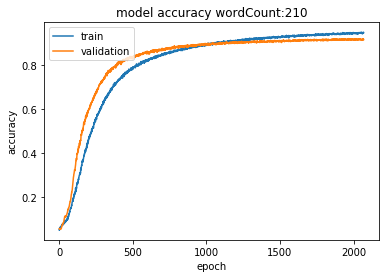

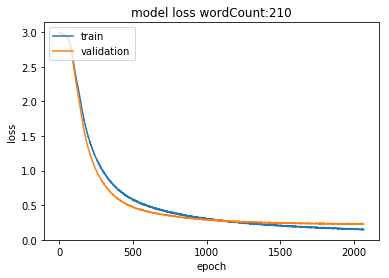

4704/5230 [=========================>....] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 2.9986 - acc: 0.0513 - val_loss: 2.9924 - val_acc: 0.0660
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 2.9958 - acc: 0.0564 - val_loss: 2.9914 - val_acc: 0.0651
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9956 - acc: 0.0497 - val_loss: 2.9904 - val_acc: 0.0651
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9945 - acc: 0.0560 - val_loss: 2.9896 - val_acc: 0.0623
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9930 - acc: 0.0610 - val_loss: 2.9887 - val_acc: 0.0627
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9926 - acc: 0.0612 - val_loss: 2.9879 - val_acc: 0.0643
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9913 - acc: 0.0587 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9070 - acc: 0.1217 - val_loss: 2.8901 - val_acc: 0.1848
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9024 - acc: 0.1289 - val_loss: 2.8855 - val_acc: 0.1844
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.8978 - acc: 0.1279 - val_loss: 2.8807 - val_acc: 0.1848
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.8942 - acc: 0.1297 - val_loss: 2.8757 - val_acc: 0.1864
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.8898 - acc: 0.1399 - val_loss: 2.8704 - val_acc: 0.1880
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.8845 - acc: 0.1386 - val_loss: 2.8649 - val_acc: 0.1962
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.8804 - acc: 0.1416 - val_loss: 2.8591 - val_acc: 0.1966
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.8713 - acc: 0.1469 - val_loss: 2.8528 - val_ac

9762/9762 [==============================] - 0s - loss: 1.7244 - acc: 0.3732 - val_loss: 1.5401 - val_acc: 0.5588
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 1.7105 - acc: 0.3794 - val_loss: 1.5314 - val_acc: 0.5555
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 1.7064 - acc: 0.3808 - val_loss: 1.5229 - val_acc: 0.5592
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 1.6973 - acc: 0.3824 - val_loss: 1.5146 - val_acc: 0.5621
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 1.6908 - acc: 0.3876 - val_loss: 1.5070 - val_acc: 0.5522
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 1.6783 - acc: 0.3932 - val_loss: 1.4972 - val_acc: 0.5707
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 1.6847 - acc: 0.3804 - val_loss: 1.4875 - val_acc: 0.5612
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 1.6731 - acc: 0.3855 - val_loss: 1.4796 -

9762/9762 [==============================] - 0s - loss: 1.0870 - acc: 0.5818 - val_loss: 0.8870 - val_acc: 0.6956
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 1.0809 - acc: 0.5830 - val_loss: 0.8851 - val_acc: 0.7001
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 1.0862 - acc: 0.5768 - val_loss: 0.8817 - val_acc: 0.7050
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 1.0749 - acc: 0.5843 - val_loss: 0.8781 - val_acc: 0.7001
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 1.0761 - acc: 0.5801 - val_loss: 0.8746 - val_acc: 0.7059
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 1.0770 - acc: 0.5821 - val_loss: 0.8740 - val_acc: 0.7079
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 1.0747 - acc: 0.5985 - val_loss: 0.8717 - val_acc: 0.7050
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 1.0770 - acc: 0.5919 - val_loss: 0.8684 -

9762/9762 [==============================] - 0s - loss: 0.8103 - acc: 0.6917 - val_loss: 0.6403 - val_acc: 0.7800
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 0.8062 - acc: 0.6925 - val_loss: 0.6392 - val_acc: 0.7808
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 0.8028 - acc: 0.6938 - val_loss: 0.6371 - val_acc: 0.7808
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 0.8066 - acc: 0.6901 - val_loss: 0.6361 - val_acc: 0.7800
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 0.8044 - acc: 0.6984 - val_loss: 0.6362 - val_acc: 0.7804
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 0.8009 - acc: 0.6926 - val_loss: 0.6370 - val_acc: 0.7784
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 0.7990 - acc: 0.6951 - val_loss: 0.6323 - val_acc: 0.7792
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 0.7956 - acc: 0.6946 - val_loss: 0.6330 -

9762/9762 [==============================] - 0s - loss: 0.6471 - acc: 0.7594 - val_loss: 0.4989 - val_acc: 0.8312
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 0.6308 - acc: 0.7694 - val_loss: 0.4966 - val_acc: 0.8255
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 0.6303 - acc: 0.7651 - val_loss: 0.4965 - val_acc: 0.8251
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 0.6369 - acc: 0.7651 - val_loss: 0.4967 - val_acc: 0.8292
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 0.6402 - acc: 0.7593 - val_loss: 0.4967 - val_acc: 0.8251
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 0.6296 - acc: 0.7689 - val_loss: 0.4942 - val_acc: 0.8279
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 0.6236 - acc: 0.7638 - val_loss: 0.5024 - val_acc: 0.8247
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 0.6334 - acc: 0.7604 - val_loss: 0.5000 -

9762/9762 [==============================] - 0s - loss: 0.5277 - acc: 0.8072 - val_loss: 0.4089 - val_acc: 0.8595
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 0.5229 - acc: 0.8069 - val_loss: 0.4093 - val_acc: 0.8603
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 0.5205 - acc: 0.8085 - val_loss: 0.4085 - val_acc: 0.8636
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 0.5242 - acc: 0.8125 - val_loss: 0.4089 - val_acc: 0.8599
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 0.5208 - acc: 0.8096 - val_loss: 0.4123 - val_acc: 0.8574
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 0.5292 - acc: 0.8075 - val_loss: 0.4078 - val_acc: 0.8603
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 0.5160 - acc: 0.8132 - val_loss: 0.4090 - val_acc: 0.8603
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 0.5283 - acc: 0.8029 - val_loss: 0.4058 -

9762/9762 [==============================] - 0s - loss: 0.4468 - acc: 0.8365 - val_loss: 0.3507 - val_acc: 0.8804
Epoch 821/5000
9762/9762 [==============================] - 0s - loss: 0.4417 - acc: 0.8411 - val_loss: 0.3518 - val_acc: 0.8787
Epoch 822/5000
9762/9762 [==============================] - 0s - loss: 0.4365 - acc: 0.8404 - val_loss: 0.3538 - val_acc: 0.8755
Epoch 823/5000
9762/9762 [==============================] - 0s - loss: 0.4481 - acc: 0.8335 - val_loss: 0.3550 - val_acc: 0.8787
Epoch 824/5000
9762/9762 [==============================] - 0s - loss: 0.4445 - acc: 0.8397 - val_loss: 0.3503 - val_acc: 0.8804
Epoch 825/5000
9762/9762 [==============================] - 0s - loss: 0.4396 - acc: 0.8432 - val_loss: 0.3598 - val_acc: 0.8730
Epoch 826/5000
9762/9762 [==============================] - 0s - loss: 0.4414 - acc: 0.8409 - val_loss: 0.3525 - val_acc: 0.8808
Epoch 827/5000
9762/9762 [==============================] - 0s - loss: 0.4438 - acc: 0.8395 - val_loss: 0.3520 -

9762/9762 [==============================] - 0s - loss: 0.3961 - acc: 0.8561 - val_loss: 0.3111 - val_acc: 0.8910
Epoch 947/5000
9762/9762 [==============================] - 0s - loss: 0.3899 - acc: 0.8663 - val_loss: 0.3142 - val_acc: 0.8906
Epoch 948/5000
9762/9762 [==============================] - 0s - loss: 0.3865 - acc: 0.8620 - val_loss: 0.3097 - val_acc: 0.8947
Epoch 949/5000
9762/9762 [==============================] - 0s - loss: 0.3839 - acc: 0.8635 - val_loss: 0.3091 - val_acc: 0.8959
Epoch 950/5000
9762/9762 [==============================] - 0s - loss: 0.3857 - acc: 0.8613 - val_loss: 0.3138 - val_acc: 0.8914
Epoch 951/5000
9762/9762 [==============================] - 0s - loss: 0.3762 - acc: 0.8621 - val_loss: 0.3111 - val_acc: 0.8878
Epoch 952/5000
9762/9762 [==============================] - 0s - loss: 0.3813 - acc: 0.8649 - val_loss: 0.3138 - val_acc: 0.8902
Epoch 953/5000
9762/9762 [==============================] - 0s - loss: 0.3894 - acc: 0.8571 - val_loss: 0.3101 -

9762/9762 [==============================] - 0s - loss: 0.3378 - acc: 0.8810 - val_loss: 0.2823 - val_acc: 0.8992
Epoch 1072/5000
9762/9762 [==============================] - 0s - loss: 0.3358 - acc: 0.8841 - val_loss: 0.2851 - val_acc: 0.9000
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.3497 - acc: 0.8777 - val_loss: 0.2878 - val_acc: 0.8972
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.3412 - acc: 0.8778 - val_loss: 0.2830 - val_acc: 0.9033
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.3520 - acc: 0.8728 - val_loss: 0.2868 - val_acc: 0.8988
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.3438 - acc: 0.8775 - val_loss: 0.2848 - val_acc: 0.9017
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.3385 - acc: 0.8811 - val_loss: 0.2855 - val_acc: 0.8996
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.3478 - acc: 0.8791 - val_loss: 0

Epoch 1197/5000
9762/9762 [==============================] - 0s - loss: 0.3061 - acc: 0.8933 - val_loss: 0.2653 - val_acc: 0.9082
Epoch 1198/5000
9762/9762 [==============================] - 0s - loss: 0.3121 - acc: 0.8905 - val_loss: 0.2665 - val_acc: 0.9033
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.3099 - acc: 0.8891 - val_loss: 0.2668 - val_acc: 0.9054
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.3049 - acc: 0.8897 - val_loss: 0.2688 - val_acc: 0.9054
Epoch 1201/5000
9762/9762 [==============================] - 0s - loss: 0.3134 - acc: 0.8913 - val_loss: 0.2667 - val_acc: 0.9050
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.3124 - acc: 0.8873 - val_loss: 0.2685 - val_acc: 0.9037
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.3047 - acc: 0.8912 - val_loss: 0.2685 - val_acc: 0.9054
Epoch 1204/5000
9762/9762 [==============================] - 0s - loss: 0.3097 - acc: 0.89

9762/9762 [==============================] - 0s - loss: 0.2981 - acc: 0.8952 - val_loss: 0.2607 - val_acc: 0.9058
Epoch 1261/5000
9762/9762 [==============================] - 0s - loss: 0.2910 - acc: 0.8960 - val_loss: 0.2605 - val_acc: 0.9058
Epoch 1262/5000
9762/9762 [==============================] - 0s - loss: 0.2974 - acc: 0.8997 - val_loss: 0.2580 - val_acc: 0.9070
Epoch 1263/5000
9762/9762 [==============================] - 0s - loss: 0.2911 - acc: 0.8969 - val_loss: 0.2613 - val_acc: 0.9050
Epoch 1264/5000
9762/9762 [==============================] - 0s - loss: 0.2962 - acc: 0.8979 - val_loss: 0.2583 - val_acc: 0.9070
Epoch 1265/5000
9762/9762 [==============================] - 0s - loss: 0.3016 - acc: 0.8939 - val_loss: 0.2618 - val_acc: 0.9050
Epoch 1266/5000
9762/9762 [==============================] - 0s - loss: 0.2903 - acc: 0.9002 - val_loss: 0.2595 - val_acc: 0.9082
Epoch 1267/5000
9762/9762 [==============================] - 0s - loss: 0.3013 - acc: 0.8942 - val_loss: 0

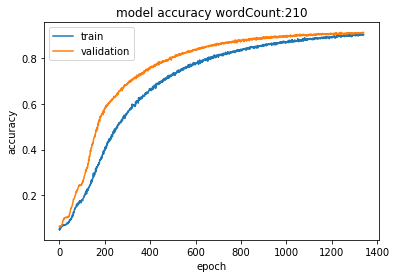

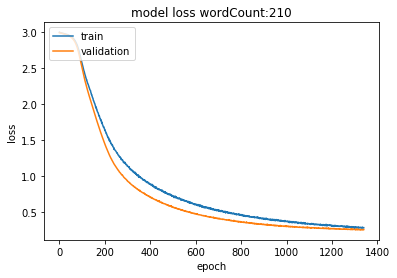

4640/5230 [=========================>....] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.0035 - acc: 0.0465 - val_loss: 2.9992 - val_acc: 0.0451
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 3.0011 - acc: 0.0503 - val_loss: 2.9979 - val_acc: 0.0451
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9993 - acc: 0.0494 - val_loss: 2.9967 - val_acc: 0.0410
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9983 - acc: 0.0528 - val_loss: 2.9956 - val_acc: 0.0369
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9962 - acc: 0.0503 - val_loss: 2.9945 - val_acc: 0.0434
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9966 - acc: 0.0510 - val_loss: 2.9935 - val_acc: 0.0586
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9952 - acc: 0.0520 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9329 - acc: 0.0913 - val_loss: 2.9155 - val_acc: 0.1417
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9286 - acc: 0.0962 - val_loss: 2.9122 - val_acc: 0.1442
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9280 - acc: 0.0961 - val_loss: 2.9087 - val_acc: 0.1512
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9243 - acc: 0.0985 - val_loss: 2.9050 - val_acc: 0.1630
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9232 - acc: 0.1028 - val_loss: 2.9014 - val_acc: 0.1700
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9185 - acc: 0.1051 - val_loss: 2.8975 - val_acc: 0.1741
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9145 - acc: 0.1045 - val_loss: 2.8933 - val_acc: 0.1762
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9089 - acc: 0.1069 - val_loss: 2.8889 - val_ac

9762/9762 [==============================] - 0s - loss: 1.8323 - acc: 0.3211 - val_loss: 1.6110 - val_acc: 0.4986
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 1.8232 - acc: 0.3225 - val_loss: 1.6037 - val_acc: 0.5055
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 1.8256 - acc: 0.3140 - val_loss: 1.5968 - val_acc: 0.5076
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 1.8212 - acc: 0.3162 - val_loss: 1.5908 - val_acc: 0.5092
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 1.8117 - acc: 0.3257 - val_loss: 1.5817 - val_acc: 0.5133
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 1.8059 - acc: 0.3282 - val_loss: 1.5754 - val_acc: 0.5154
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 1.7970 - acc: 0.3249 - val_loss: 1.5687 - val_acc: 0.5043
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 1.7927 - acc: 0.3341 - val_loss: 1.5620 -

9762/9762 [==============================] - 0s - loss: 1.2846 - acc: 0.4948 - val_loss: 1.0217 - val_acc: 0.6600
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 1.2738 - acc: 0.5031 - val_loss: 1.0176 - val_acc: 0.6567
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 1.2813 - acc: 0.4988 - val_loss: 1.0161 - val_acc: 0.6620
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 1.2724 - acc: 0.5053 - val_loss: 1.0125 - val_acc: 0.6649
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 1.2645 - acc: 0.5036 - val_loss: 1.0081 - val_acc: 0.6633
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 1.2807 - acc: 0.4967 - val_loss: 1.0094 - val_acc: 0.6575
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 1.2629 - acc: 0.4974 - val_loss: 1.0038 - val_acc: 0.6637
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 1.2551 - acc: 0.5091 - val_loss: 1.0005 -

9762/9762 [==============================] - 0s - loss: 0.9882 - acc: 0.6141 - val_loss: 0.7497 - val_acc: 0.7354
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 0.9783 - acc: 0.6146 - val_loss: 0.7493 - val_acc: 0.7399
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 0.9736 - acc: 0.6098 - val_loss: 0.7468 - val_acc: 0.7333
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 0.9752 - acc: 0.6140 - val_loss: 0.7437 - val_acc: 0.7349
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 0.9789 - acc: 0.6111 - val_loss: 0.7441 - val_acc: 0.7395
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 0.9715 - acc: 0.6132 - val_loss: 0.7430 - val_acc: 0.7435
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 0.9699 - acc: 0.6188 - val_loss: 0.7404 - val_acc: 0.7395
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 0.9736 - acc: 0.6151 - val_loss: 0.7382 -

9762/9762 [==============================] - 0s - loss: 0.8017 - acc: 0.6862 - val_loss: 0.5879 - val_acc: 0.8001
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 0.7928 - acc: 0.6874 - val_loss: 0.5888 - val_acc: 0.7993
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 0.8048 - acc: 0.6893 - val_loss: 0.5857 - val_acc: 0.7997
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 0.7854 - acc: 0.6929 - val_loss: 0.5841 - val_acc: 0.8017
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 0.7889 - acc: 0.6956 - val_loss: 0.5843 - val_acc: 0.8013
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 0.7944 - acc: 0.6898 - val_loss: 0.5815 - val_acc: 0.8029
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 0.7867 - acc: 0.6902 - val_loss: 0.5846 - val_acc: 0.8013
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 0.7894 - acc: 0.6964 - val_loss: 0.5838 -

9762/9762 [==============================] - 0s - loss: 0.6758 - acc: 0.7369 - val_loss: 0.4839 - val_acc: 0.8398
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 0.6690 - acc: 0.7493 - val_loss: 0.4846 - val_acc: 0.8390
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 0.6668 - acc: 0.7446 - val_loss: 0.4812 - val_acc: 0.8419
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 0.6637 - acc: 0.7499 - val_loss: 0.4830 - val_acc: 0.8378
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 0.6641 - acc: 0.7428 - val_loss: 0.4792 - val_acc: 0.8447
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 0.6669 - acc: 0.7447 - val_loss: 0.4822 - val_acc: 0.8406
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 0.6680 - acc: 0.7446 - val_loss: 0.4790 - val_acc: 0.8415
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 0.6666 - acc: 0.7478 - val_loss: 0.4799 -

9762/9762 [==============================] - 0s - loss: 0.5782 - acc: 0.7842 - val_loss: 0.4093 - val_acc: 0.8652
Epoch 821/5000
9762/9762 [==============================] - 0s - loss: 0.5805 - acc: 0.7870 - val_loss: 0.4141 - val_acc: 0.8656
Epoch 822/5000
9762/9762 [==============================] - 0s - loss: 0.5786 - acc: 0.7767 - val_loss: 0.4103 - val_acc: 0.8660
Epoch 823/5000
9762/9762 [==============================] - 0s - loss: 0.5711 - acc: 0.7869 - val_loss: 0.4143 - val_acc: 0.8628
Epoch 824/5000
9762/9762 [==============================] - 0s - loss: 0.5807 - acc: 0.7820 - val_loss: 0.4093 - val_acc: 0.8669
Epoch 825/5000
9762/9762 [==============================] - 0s - loss: 0.5683 - acc: 0.7858 - val_loss: 0.4077 - val_acc: 0.8640
Epoch 826/5000
9762/9762 [==============================] - 0s - loss: 0.5721 - acc: 0.7848 - val_loss: 0.4078 - val_acc: 0.8648
Epoch 827/5000
9762/9762 [==============================] - 0s - loss: 0.5804 - acc: 0.7832 - val_loss: 0.4099 -

9762/9762 [==============================] - 0s - loss: 0.5095 - acc: 0.8114 - val_loss: 0.3615 - val_acc: 0.8779
Epoch 947/5000
9762/9762 [==============================] - 0s - loss: 0.5086 - acc: 0.8129 - val_loss: 0.3639 - val_acc: 0.8779
Epoch 948/5000
9762/9762 [==============================] - 0s - loss: 0.4965 - acc: 0.8164 - val_loss: 0.3598 - val_acc: 0.8787
Epoch 949/5000
9762/9762 [==============================] - 0s - loss: 0.5024 - acc: 0.8131 - val_loss: 0.3641 - val_acc: 0.8775
Epoch 950/5000
9762/9762 [==============================] - 0s - loss: 0.5056 - acc: 0.8136 - val_loss: 0.3632 - val_acc: 0.8812
Epoch 951/5000
9762/9762 [==============================] - 0s - loss: 0.5139 - acc: 0.8133 - val_loss: 0.3610 - val_acc: 0.8783
Epoch 952/5000
9762/9762 [==============================] - 0s - loss: 0.4989 - acc: 0.8153 - val_loss: 0.3608 - val_acc: 0.8779
Epoch 953/5000
9762/9762 [==============================] - 0s - loss: 0.5060 - acc: 0.8164 - val_loss: 0.3583 -

9762/9762 [==============================] - 0s - loss: 0.4489 - acc: 0.8336 - val_loss: 0.3269 - val_acc: 0.8841
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.4511 - acc: 0.8366 - val_loss: 0.3274 - val_acc: 0.8841
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.4479 - acc: 0.8374 - val_loss: 0.3292 - val_acc: 0.8832
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.4549 - acc: 0.8342 - val_loss: 0.3289 - val_acc: 0.8837
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.4531 - acc: 0.8349 - val_loss: 0.3284 - val_acc: 0.8845
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.4527 - acc: 0.8344 - val_loss: 0.3247 - val_acc: 0.8853
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.4518 - acc: 0.8355 - val_loss: 0.3254 - val_acc: 0.8832
Epoch 1079/5000
9762/9762 [==============================] - 0s - loss: 0.4517 - acc: 0.8386 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.4130 - acc: 0.8505 - val_loss: 0.3007 - val_acc: 0.8984
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.4040 - acc: 0.8542 - val_loss: 0.3033 - val_acc: 0.8923
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.4041 - acc: 0.8529 - val_loss: 0.3037 - val_acc: 0.8890
Epoch 1201/5000
9762/9762 [==============================] - 0s - loss: 0.4097 - acc: 0.8557 - val_loss: 0.3012 - val_acc: 0.8935
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.4077 - acc: 0.8553 - val_loss: 0.3012 - val_acc: 0.8935
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.4169 - acc: 0.8503 - val_loss: 0.2999 - val_acc: 0.8968
Epoch 1204/5000
9762/9762 [==============================] - 0s - loss: 0.4047 - acc: 0.8512 - val_loss: 0.3049 - val_acc: 0.8882
Epoch 1205/5000
9762/9762 [==============================] - 0s - loss: 0.4072 - acc: 0.8579 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.3815 - acc: 0.8649 - val_loss: 0.2814 - val_acc: 0.8968
Epoch 1324/5000
9762/9762 [==============================] - 0s - loss: 0.3806 - acc: 0.8588 - val_loss: 0.2805 - val_acc: 0.9017
Epoch 1325/5000
9762/9762 [==============================] - 0s - loss: 0.3699 - acc: 0.8693 - val_loss: 0.2807 - val_acc: 0.8980
Epoch 1326/5000
9762/9762 [==============================] - 0s - loss: 0.3746 - acc: 0.8675 - val_loss: 0.2814 - val_acc: 0.9000
Epoch 1327/5000
9762/9762 [==============================] - 0s - loss: 0.3675 - acc: 0.8679 - val_loss: 0.2817 - val_acc: 0.8984
Epoch 1328/5000
9762/9762 [==============================] - 0s - loss: 0.3785 - acc: 0.8667 - val_loss: 0.2818 - val_acc: 0.8972
Epoch 1329/5000
9762/9762 [==============================] - 0s - loss: 0.3708 - acc: 0.8705 - val_loss: 0.2856 - val_acc: 0.8976
Epoch 1330/5000
9762/9762 [==============================] - 0s - loss: 0.3733 - acc: 0.8701 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.3386 - acc: 0.8807 - val_loss: 0.2637 - val_acc: 0.8996
Epoch 1450/5000
9762/9762 [==============================] - 0s - loss: 0.3516 - acc: 0.8782 - val_loss: 0.2686 - val_acc: 0.9013
Epoch 1451/5000
9762/9762 [==============================] - 0s - loss: 0.3445 - acc: 0.8796 - val_loss: 0.2680 - val_acc: 0.9021
Epoch 1452/5000
9762/9762 [==============================] - 0s - loss: 0.3484 - acc: 0.8763 - val_loss: 0.2674 - val_acc: 0.9017
Epoch 1453/5000
9762/9762 [==============================] - 0s - loss: 0.3461 - acc: 0.8774 - val_loss: 0.2623 - val_acc: 0.9066
Epoch 1454/5000
9762/9762 [==============================] - 0s - loss: 0.3401 - acc: 0.8780 - val_loss: 0.2619 - val_acc: 0.9029
Epoch 1455/5000
9762/9762 [==============================] - 0s - loss: 0.3424 - acc: 0.8825 - val_loss: 0.2638 - val_acc: 0.9013
Epoch 1456/5000
9762/9762 [==============================] - 0s - loss: 0.3375 - acc: 0.8832 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.3240 - acc: 0.8869 - val_loss: 0.2502 - val_acc: 0.9037
Epoch 1576/5000
9762/9762 [==============================] - 0s - loss: 0.3197 - acc: 0.8868 - val_loss: 0.2503 - val_acc: 0.9078
Epoch 1577/5000
9762/9762 [==============================] - 0s - loss: 0.3179 - acc: 0.8869 - val_loss: 0.2522 - val_acc: 0.9078
Epoch 1578/5000
9762/9762 [==============================] - 0s - loss: 0.3203 - acc: 0.8904 - val_loss: 0.2525 - val_acc: 0.9050
Epoch 1579/5000
9762/9762 [==============================] - 0s - loss: 0.3212 - acc: 0.8883 - val_loss: 0.2501 - val_acc: 0.9070
Epoch 1580/5000
9762/9762 [==============================] - 0s - loss: 0.3217 - acc: 0.8871 - val_loss: 0.2502 - val_acc: 0.9066
Epoch 1581/5000
9762/9762 [==============================] - 0s - loss: 0.3143 - acc: 0.8893 - val_loss: 0.2519 - val_acc: 0.9074
Epoch 1582/5000
9762/9762 [==============================] - 0s - loss: 0.3208 - acc: 0.8899 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2995 - acc: 0.8957 - val_loss: 0.2396 - val_acc: 0.9103
Epoch 1702/5000
9762/9762 [==============================] - 0s - loss: 0.2971 - acc: 0.8984 - val_loss: 0.2423 - val_acc: 0.9062
Epoch 1703/5000
9762/9762 [==============================] - 0s - loss: 0.2903 - acc: 0.9009 - val_loss: 0.2413 - val_acc: 0.9091
Epoch 1704/5000
9762/9762 [==============================] - 0s - loss: 0.3001 - acc: 0.8936 - val_loss: 0.2437 - val_acc: 0.9123
Epoch 1705/5000
9762/9762 [==============================] - 0s - loss: 0.2992 - acc: 0.8954 - val_loss: 0.2393 - val_acc: 0.9095
Epoch 1706/5000
9762/9762 [==============================] - 0s - loss: 0.2935 - acc: 0.8990 - val_loss: 0.2399 - val_acc: 0.9132
Epoch 1707/5000
9762/9762 [==============================] - 0s - loss: 0.2971 - acc: 0.8937 - val_loss: 0.2405 - val_acc: 0.9111
Epoch 1708/5000
9762/9762 [==============================] - 0s - loss: 0.2946 - acc: 0.8955 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2774 - acc: 0.9061 - val_loss: 0.2324 - val_acc: 0.9115
Epoch 1828/5000
9762/9762 [==============================] - 0s - loss: 0.2829 - acc: 0.8987 - val_loss: 0.2311 - val_acc: 0.9132
Epoch 1829/5000
9762/9762 [==============================] - 0s - loss: 0.2854 - acc: 0.8996 - val_loss: 0.2318 - val_acc: 0.9123
Epoch 1830/5000
9762/9762 [==============================] - 0s - loss: 0.2710 - acc: 0.9028 - val_loss: 0.2326 - val_acc: 0.9136
Epoch 1831/5000
9762/9762 [==============================] - 0s - loss: 0.2811 - acc: 0.9064 - val_loss: 0.2330 - val_acc: 0.9078
Epoch 1832/5000
9762/9762 [==============================] - 0s - loss: 0.2832 - acc: 0.8992 - val_loss: 0.2337 - val_acc: 0.9103
Epoch 1833/5000
9762/9762 [==============================] - 0s - loss: 0.2775 - acc: 0.9039 - val_loss: 0.2333 - val_acc: 0.9107
Epoch 1834/5000
9762/9762 [==============================] - 0s - loss: 0.2682 - acc: 0.9056 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2686 - acc: 0.9062 - val_loss: 0.2278 - val_acc: 0.9136
Epoch 1954/5000
9762/9762 [==============================] - 0s - loss: 0.2621 - acc: 0.9107 - val_loss: 0.2315 - val_acc: 0.9140
Epoch 1955/5000
9762/9762 [==============================] - 0s - loss: 0.2647 - acc: 0.9080 - val_loss: 0.2299 - val_acc: 0.9148
Epoch 1956/5000
9762/9762 [==============================] - 0s - loss: 0.2681 - acc: 0.9076 - val_loss: 0.2283 - val_acc: 0.9148
Epoch 1957/5000
9762/9762 [==============================] - 0s - loss: 0.2621 - acc: 0.9099 - val_loss: 0.2254 - val_acc: 0.9115
Epoch 1958/5000
9762/9762 [==============================] - 0s - loss: 0.2688 - acc: 0.9061 - val_loss: 0.2282 - val_acc: 0.9140
Epoch 1959/5000
9762/9762 [==============================] - 0s - loss: 0.2601 - acc: 0.9082 - val_loss: 0.2252 - val_acc: 0.9127
Epoch 1960/5000
9762/9762 [==============================] - 0s - loss: 0.2595 - acc: 0.9080 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2518 - acc: 0.9148 - val_loss: 0.2229 - val_acc: 0.9181
Epoch 2080/5000
9762/9762 [==============================] - 0s - loss: 0.2535 - acc: 0.9092 - val_loss: 0.2215 - val_acc: 0.9148
Epoch 2081/5000
9762/9762 [==============================] - 0s - loss: 0.2558 - acc: 0.9145 - val_loss: 0.2238 - val_acc: 0.9148
Epoch 2082/5000
9762/9762 [==============================] - 0s - loss: 0.2553 - acc: 0.9113 - val_loss: 0.2269 - val_acc: 0.9156
Epoch 2083/5000
9762/9762 [==============================] - 0s - loss: 0.2488 - acc: 0.9111 - val_loss: 0.2241 - val_acc: 0.9177
Epoch 2084/5000
9762/9762 [==============================] - 0s - loss: 0.2524 - acc: 0.9126 - val_loss: 0.2234 - val_acc: 0.9172
Epoch 2085/5000
9762/9762 [==============================] - 0s - loss: 0.2455 - acc: 0.9165 - val_loss: 0.2247 - val_acc: 0.9160
Epoch 2086/5000
9762/9762 [==============================] - 0s - loss: 0.2479 - acc: 0.9133 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.2295 - acc: 0.9219 - val_loss: 0.2190 - val_acc: 0.9172
Epoch 2206/5000
9762/9762 [==============================] - 0s - loss: 0.2345 - acc: 0.9179 - val_loss: 0.2207 - val_acc: 0.9164
Epoch 2207/5000
9762/9762 [==============================] - 0s - loss: 0.2337 - acc: 0.9191 - val_loss: 0.2185 - val_acc: 0.9172
Epoch 2208/5000
9762/9762 [==============================] - 0s - loss: 0.2382 - acc: 0.9161 - val_loss: 0.2248 - val_acc: 0.9168
Epoch 2209/5000
9762/9762 [==============================] - 0s - loss: 0.2372 - acc: 0.9152 - val_loss: 0.2171 - val_acc: 0.9181
Epoch 2210/5000
9762/9762 [==============================] - 0s - loss: 0.2341 - acc: 0.9178 - val_loss: 0.2199 - val_acc: 0.9160
Epoch 2211/5000
9762/9762 [==============================] - 0s - loss: 0.2382 - acc: 0.9154 - val_loss: 0.2215 - val_acc: 0.9193
Epoch 2212/5000
9762/9762 [==============================] - 0s - loss: 0.2368 - acc: 0.9162 - val_loss: 0

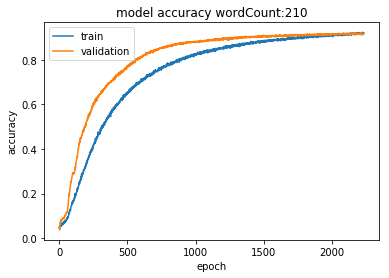

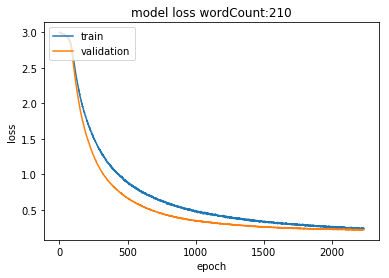

5056/5230 [============================>.] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.0009 - acc: 0.0522 - val_loss: 2.9952 - val_acc: 0.0365
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 2.9977 - acc: 0.0529 - val_loss: 2.9942 - val_acc: 0.0373
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 2.9975 - acc: 0.0549 - val_loss: 2.9933 - val_acc: 0.0369
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 2.9990 - acc: 0.0544 - val_loss: 2.9924 - val_acc: 0.0471
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 2.9965 - acc: 0.0569 - val_loss: 2.9916 - val_acc: 0.0557
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9930 - acc: 0.0554 - val_loss: 2.9909 - val_acc: 0.0615
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9949 - acc: 0.0531 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9465 - acc: 0.0779 - val_loss: 2.9358 - val_acc: 0.1200
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9442 - acc: 0.0785 - val_loss: 2.9338 - val_acc: 0.1209
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9422 - acc: 0.0806 - val_loss: 2.9316 - val_acc: 0.1233
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9416 - acc: 0.0765 - val_loss: 2.9293 - val_acc: 0.1233
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9400 - acc: 0.0797 - val_loss: 2.9270 - val_acc: 0.1237
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9383 - acc: 0.0773 - val_loss: 2.9247 - val_acc: 0.1184
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9362 - acc: 0.0797 - val_loss: 2.9221 - val_acc: 0.1217
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9353 - acc: 0.0804 - val_loss: 2.9195 - val_ac

9762/9762 [==============================] - 0s - loss: 2.1106 - acc: 0.2395 - val_loss: 1.8796 - val_acc: 0.4326
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 2.0878 - acc: 0.2526 - val_loss: 1.8696 - val_acc: 0.4302
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 2.1013 - acc: 0.2360 - val_loss: 1.8660 - val_acc: 0.4367
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 2.0831 - acc: 0.2430 - val_loss: 1.8569 - val_acc: 0.4334
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 2.0826 - acc: 0.2538 - val_loss: 1.8518 - val_acc: 0.4277
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 2.0700 - acc: 0.2475 - val_loss: 1.8421 - val_acc: 0.4404
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 2.0603 - acc: 0.2550 - val_loss: 1.8360 - val_acc: 0.4359
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 2.0569 - acc: 0.2572 - val_loss: 1.8270 -

9762/9762 [==============================] - 0s - loss: 1.5115 - acc: 0.4203 - val_loss: 1.2029 - val_acc: 0.6137
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 1.5105 - acc: 0.4079 - val_loss: 1.2004 - val_acc: 0.6182
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 1.5080 - acc: 0.4131 - val_loss: 1.1961 - val_acc: 0.6211
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 1.5040 - acc: 0.4204 - val_loss: 1.1908 - val_acc: 0.6239
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 1.4953 - acc: 0.4205 - val_loss: 1.1854 - val_acc: 0.6260
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 1.4838 - acc: 0.4258 - val_loss: 1.1824 - val_acc: 0.6338
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 1.5008 - acc: 0.4165 - val_loss: 1.1826 - val_acc: 0.6305
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 1.4883 - acc: 0.4179 - val_loss: 1.1769 -

9762/9762 [==============================] - 0s - loss: 1.1766 - acc: 0.5342 - val_loss: 0.8640 - val_acc: 0.7177
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 1.1681 - acc: 0.5320 - val_loss: 0.8610 - val_acc: 0.7141
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 1.1701 - acc: 0.5356 - val_loss: 0.8614 - val_acc: 0.7214
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 1.1745 - acc: 0.5343 - val_loss: 0.8601 - val_acc: 0.7169
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 1.1684 - acc: 0.5385 - val_loss: 0.8580 - val_acc: 0.7145
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 1.1656 - acc: 0.5341 - val_loss: 0.8543 - val_acc: 0.7202
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 1.1687 - acc: 0.5413 - val_loss: 0.8522 - val_acc: 0.7198
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 1.1582 - acc: 0.5447 - val_loss: 0.8526 -

9762/9762 [==============================] - 0s - loss: 0.9801 - acc: 0.6136 - val_loss: 0.6762 - val_acc: 0.7837
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 0.9709 - acc: 0.6190 - val_loss: 0.6730 - val_acc: 0.7739
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 0.9732 - acc: 0.6209 - val_loss: 0.6734 - val_acc: 0.7784
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 0.9727 - acc: 0.6194 - val_loss: 0.6707 - val_acc: 0.7776
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 0.9733 - acc: 0.6175 - val_loss: 0.6692 - val_acc: 0.7788
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 0.9579 - acc: 0.6200 - val_loss: 0.6700 - val_acc: 0.7780
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 0.9602 - acc: 0.6302 - val_loss: 0.6688 - val_acc: 0.7800
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 0.9666 - acc: 0.6241 - val_loss: 0.6704 -

9762/9762 [==============================] - 0s - loss: 0.8204 - acc: 0.6848 - val_loss: 0.5605 - val_acc: 0.8144
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 0.8342 - acc: 0.6755 - val_loss: 0.5523 - val_acc: 0.8140
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 0.8134 - acc: 0.6807 - val_loss: 0.5551 - val_acc: 0.8111
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 0.8203 - acc: 0.6803 - val_loss: 0.5529 - val_acc: 0.8181
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 0.8137 - acc: 0.6837 - val_loss: 0.5500 - val_acc: 0.8206
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 0.8196 - acc: 0.6777 - val_loss: 0.5500 - val_acc: 0.8189
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 0.8139 - acc: 0.6840 - val_loss: 0.5477 - val_acc: 0.8173
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 0.8181 - acc: 0.6843 - val_loss: 0.5487 -

9762/9762 [==============================] - 0s - loss: 0.7265 - acc: 0.7235 - val_loss: 0.4722 - val_acc: 0.8374
Epoch 821/5000
9762/9762 [==============================] - 0s - loss: 0.7201 - acc: 0.7308 - val_loss: 0.4714 - val_acc: 0.8431
Epoch 822/5000
9762/9762 [==============================] - 0s - loss: 0.7228 - acc: 0.7308 - val_loss: 0.4732 - val_acc: 0.8390
Epoch 823/5000
9762/9762 [==============================] - 0s - loss: 0.7107 - acc: 0.7217 - val_loss: 0.4741 - val_acc: 0.8390
Epoch 824/5000
9762/9762 [==============================] - 0s - loss: 0.7276 - acc: 0.7176 - val_loss: 0.4700 - val_acc: 0.8410
Epoch 825/5000
9762/9762 [==============================] - 0s - loss: 0.7089 - acc: 0.7294 - val_loss: 0.4668 - val_acc: 0.8419
Epoch 826/5000
9762/9762 [==============================] - 0s - loss: 0.7087 - acc: 0.7300 - val_loss: 0.4742 - val_acc: 0.8365
Epoch 827/5000
9762/9762 [==============================] - 0s - loss: 0.7116 - acc: 0.7294 - val_loss: 0.4740 -

9762/9762 [==============================] - 0s - loss: 0.6328 - acc: 0.7618 - val_loss: 0.4152 - val_acc: 0.8583
Epoch 947/5000
9762/9762 [==============================] - 0s - loss: 0.6357 - acc: 0.7556 - val_loss: 0.4139 - val_acc: 0.8595
Epoch 948/5000
9762/9762 [==============================] - 0s - loss: 0.6421 - acc: 0.7554 - val_loss: 0.4153 - val_acc: 0.8583
Epoch 949/5000
9762/9762 [==============================] - 0s - loss: 0.6409 - acc: 0.7559 - val_loss: 0.4196 - val_acc: 0.8517
Epoch 950/5000
9762/9762 [==============================] - 0s - loss: 0.6327 - acc: 0.7637 - val_loss: 0.4150 - val_acc: 0.8578
Epoch 951/5000
9762/9762 [==============================] - 0s - loss: 0.6373 - acc: 0.7603 - val_loss: 0.4156 - val_acc: 0.8583
Epoch 952/5000
9762/9762 [==============================] - 0s - loss: 0.6344 - acc: 0.7571 - val_loss: 0.4103 - val_acc: 0.8566
Epoch 953/5000
9762/9762 [==============================] - 0s - loss: 0.6385 - acc: 0.7611 - val_loss: 0.4118 -

9762/9762 [==============================] - 0s - loss: 0.5787 - acc: 0.7864 - val_loss: 0.3729 - val_acc: 0.8714
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.5746 - acc: 0.7840 - val_loss: 0.3701 - val_acc: 0.8738
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.5683 - acc: 0.7869 - val_loss: 0.3718 - val_acc: 0.8718
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.5715 - acc: 0.7917 - val_loss: 0.3698 - val_acc: 0.8697
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.5825 - acc: 0.7841 - val_loss: 0.3713 - val_acc: 0.8755
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.5633 - acc: 0.7865 - val_loss: 0.3688 - val_acc: 0.8742
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.5711 - acc: 0.7898 - val_loss: 0.3718 - val_acc: 0.8701
Epoch 1079/5000
9762/9762 [==============================] - 0s - loss: 0.5668 - acc: 0.7866 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.5242 - acc: 0.8034 - val_loss: 0.3397 - val_acc: 0.8837
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.5133 - acc: 0.8151 - val_loss: 0.3400 - val_acc: 0.8849
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.5179 - acc: 0.8031 - val_loss: 0.3413 - val_acc: 0.8816
Epoch 1201/5000
9762/9762 [==============================] - 0s - loss: 0.5240 - acc: 0.8044 - val_loss: 0.3383 - val_acc: 0.8832
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.5275 - acc: 0.8042 - val_loss: 0.3429 - val_acc: 0.8779
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.5312 - acc: 0.8072 - val_loss: 0.3383 - val_acc: 0.8783
Epoch 1204/5000
9762/9762 [==============================] - 0s - loss: 0.5182 - acc: 0.8093 - val_loss: 0.3388 - val_acc: 0.8841
Epoch 1205/5000
9762/9762 [==============================] - 0s - loss: 0.5169 - acc: 0.8120 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.4853 - acc: 0.8221 - val_loss: 0.3143 - val_acc: 0.8886
Epoch 1324/5000
9762/9762 [==============================] - 0s - loss: 0.4847 - acc: 0.8210 - val_loss: 0.3171 - val_acc: 0.8882
Epoch 1325/5000
9762/9762 [==============================] - 0s - loss: 0.4816 - acc: 0.8232 - val_loss: 0.3177 - val_acc: 0.8837
Epoch 1326/5000
9762/9762 [==============================] - 0s - loss: 0.4731 - acc: 0.8251 - val_loss: 0.3145 - val_acc: 0.8914
Epoch 1327/5000
9762/9762 [==============================] - 0s - loss: 0.4733 - acc: 0.8258 - val_loss: 0.3184 - val_acc: 0.8865
Epoch 1328/5000
9762/9762 [==============================] - 0s - loss: 0.4734 - acc: 0.8259 - val_loss: 0.3150 - val_acc: 0.8890
Epoch 1329/5000
9762/9762 [==============================] - 0s - loss: 0.4760 - acc: 0.8273 - val_loss: 0.3133 - val_acc: 0.8910
Epoch 1330/5000
9762/9762 [==============================] - 0s - loss: 0.4848 - acc: 0.8234 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.4397 - acc: 0.8398 - val_loss: 0.2985 - val_acc: 0.8959
Epoch 1450/5000
9762/9762 [==============================] - 0s - loss: 0.4432 - acc: 0.8371 - val_loss: 0.2961 - val_acc: 0.8988
Epoch 1451/5000
9762/9762 [==============================] - 0s - loss: 0.4450 - acc: 0.8368 - val_loss: 0.3022 - val_acc: 0.8923
Epoch 1452/5000
9762/9762 [==============================] - 0s - loss: 0.4431 - acc: 0.8399 - val_loss: 0.2972 - val_acc: 0.8959
Epoch 1453/5000
9762/9762 [==============================] - 0s - loss: 0.4497 - acc: 0.8373 - val_loss: 0.2945 - val_acc: 0.8972
Epoch 1454/5000
9762/9762 [==============================] - 0s - loss: 0.4427 - acc: 0.8415 - val_loss: 0.2985 - val_acc: 0.8943
Epoch 1455/5000
9762/9762 [==============================] - 0s - loss: 0.4425 - acc: 0.8429 - val_loss: 0.2964 - val_acc: 0.8968
Epoch 1456/5000
9762/9762 [==============================] - 0s - loss: 0.4463 - acc: 0.8384 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.4146 - acc: 0.8514 - val_loss: 0.2802 - val_acc: 0.9021
Epoch 1576/5000
9762/9762 [==============================] - 0s - loss: 0.4191 - acc: 0.8493 - val_loss: 0.2806 - val_acc: 0.8992
Epoch 1577/5000
9762/9762 [==============================] - 0s - loss: 0.4205 - acc: 0.8487 - val_loss: 0.2799 - val_acc: 0.8976
Epoch 1578/5000
9762/9762 [==============================] - 0s - loss: 0.4060 - acc: 0.8551 - val_loss: 0.2801 - val_acc: 0.8996
Epoch 1579/5000
9762/9762 [==============================] - 0s - loss: 0.4225 - acc: 0.8445 - val_loss: 0.2886 - val_acc: 0.8914
Epoch 1580/5000
9762/9762 [==============================] - 0s - loss: 0.4272 - acc: 0.8437 - val_loss: 0.2790 - val_acc: 0.9000
Epoch 1581/5000
9762/9762 [==============================] - 0s - loss: 0.4167 - acc: 0.8524 - val_loss: 0.2802 - val_acc: 0.8976
Epoch 1582/5000
9762/9762 [==============================] - 0s - loss: 0.4110 - acc: 0.8524 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.3942 - acc: 0.8588 - val_loss: 0.2677 - val_acc: 0.9041
Epoch 1700/5000
9762/9762 [==============================] - 0s - loss: 0.3920 - acc: 0.8599 - val_loss: 0.2710 - val_acc: 0.9009
Epoch 1701/5000
9762/9762 [==============================] - 0s - loss: 0.3856 - acc: 0.8603 - val_loss: 0.2668 - val_acc: 0.9013
Epoch 1702/5000
9762/9762 [==============================] - 0s - loss: 0.3857 - acc: 0.8637 - val_loss: 0.2756 - val_acc: 0.9013
Epoch 1703/5000
9762/9762 [==============================] - 0s - loss: 0.3846 - acc: 0.8632 - val_loss: 0.2672 - val_acc: 0.8992
Epoch 1704/5000
9762/9762 [==============================] - 0s - loss: 0.3887 - acc: 0.8591 - val_loss: 0.2637 - val_acc: 0.9058
Epoch 1705/5000
9762/9762 [==============================] - 0s - loss: 0.3915 - acc: 0.8635 - val_loss: 0.2647 - val_acc: 0.9017
Epoch 1706/5000
9762/9762 [==============================] - 0s - loss: 0.3967 - acc: 0.8579 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.3738 - acc: 0.8671 - val_loss: 0.2539 - val_acc: 0.9095
Epoch 1826/5000
9762/9762 [==============================] - 0s - loss: 0.3682 - acc: 0.8723 - val_loss: 0.2586 - val_acc: 0.9095
Epoch 1827/5000
9762/9762 [==============================] - 0s - loss: 0.3666 - acc: 0.8685 - val_loss: 0.2521 - val_acc: 0.9115
Epoch 1828/5000
9762/9762 [==============================] - 0s - loss: 0.3807 - acc: 0.8645 - val_loss: 0.2591 - val_acc: 0.9062
Epoch 1829/5000
9762/9762 [==============================] - 0s - loss: 0.3679 - acc: 0.8687 - val_loss: 0.2568 - val_acc: 0.9062
Epoch 1830/5000
9762/9762 [==============================] - 0s - loss: 0.3722 - acc: 0.8654 - val_loss: 0.2590 - val_acc: 0.9058
Epoch 1831/5000
9762/9762 [==============================] - 0s - loss: 0.3742 - acc: 0.8666 - val_loss: 0.2547 - val_acc: 0.9086
Epoch 1832/5000
9762/9762 [==============================] - 0s - loss: 0.3691 - acc: 0.8674 - val_loss: 0

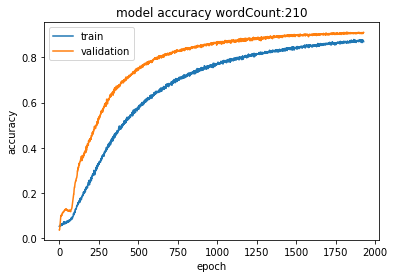

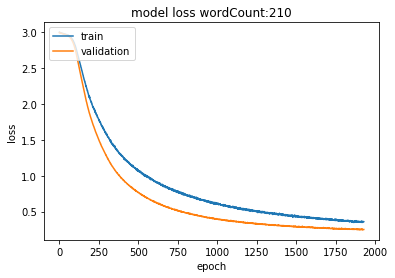

4864/5230 [==========================>...] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.0164 - acc: 0.0492 - val_loss: 2.9980 - val_acc: 0.0623
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 3.0107 - acc: 0.0507 - val_loss: 2.9965 - val_acc: 0.0590
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 3.0124 - acc: 0.0490 - val_loss: 2.9952 - val_acc: 0.0553
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 3.0080 - acc: 0.0512 - val_loss: 2.9941 - val_acc: 0.0553
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 3.0039 - acc: 0.0519 - val_loss: 2.9932 - val_acc: 0.0512
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 3.0027 - acc: 0.0539 - val_loss: 2.9925 - val_acc: 0.0471
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9992 - acc: 0.0547 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9705 - acc: 0.0730 - val_loss: 2.9616 - val_acc: 0.0950
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9700 - acc: 0.0793 - val_loss: 2.9608 - val_acc: 0.0950
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9686 - acc: 0.0791 - val_loss: 2.9599 - val_acc: 0.0959
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9686 - acc: 0.0782 - val_loss: 2.9591 - val_acc: 0.0950
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9684 - acc: 0.0758 - val_loss: 2.9581 - val_acc: 0.0963
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9666 - acc: 0.0763 - val_loss: 2.9572 - val_acc: 0.0955
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9637 - acc: 0.0838 - val_loss: 2.9559 - val_acc: 0.0971
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9643 - acc: 0.0839 - val_loss: 2.9547 - val_ac

9762/9762 [==============================] - 0s - loss: 2.3739 - acc: 0.1878 - val_loss: 2.2068 - val_acc: 0.2794
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 2.3850 - acc: 0.1741 - val_loss: 2.2018 - val_acc: 0.2839
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 2.3722 - acc: 0.1813 - val_loss: 2.1936 - val_acc: 0.2831
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 2.3650 - acc: 0.1868 - val_loss: 2.1865 - val_acc: 0.2802
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 2.3608 - acc: 0.1825 - val_loss: 2.1802 - val_acc: 0.2868
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 2.3580 - acc: 0.1801 - val_loss: 2.1728 - val_acc: 0.2868
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 2.3450 - acc: 0.1897 - val_loss: 2.1669 - val_acc: 0.2876
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 2.3389 - acc: 0.1859 - val_loss: 2.1597 -

9762/9762 [==============================] - 0s - loss: 1.8246 - acc: 0.3118 - val_loss: 1.5228 - val_acc: 0.5256
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 1.8144 - acc: 0.3192 - val_loss: 1.5218 - val_acc: 0.5346
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 1.8018 - acc: 0.3200 - val_loss: 1.5174 - val_acc: 0.5322
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 1.8088 - acc: 0.3177 - val_loss: 1.5131 - val_acc: 0.5272
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 1.8084 - acc: 0.3179 - val_loss: 1.5106 - val_acc: 0.5289
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 1.8027 - acc: 0.3190 - val_loss: 1.5055 - val_acc: 0.5317
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 1.8043 - acc: 0.3190 - val_loss: 1.5079 - val_acc: 0.5301
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 1.7933 - acc: 0.3249 - val_loss: 1.4975 -

9762/9762 [==============================] - 0s - loss: 1.4775 - acc: 0.4149 - val_loss: 1.1455 - val_acc: 0.6325
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 1.4674 - acc: 0.4226 - val_loss: 1.1467 - val_acc: 0.6309
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 1.4679 - acc: 0.4175 - val_loss: 1.1412 - val_acc: 0.6317
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 1.4716 - acc: 0.4213 - val_loss: 1.1390 - val_acc: 0.6301
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 1.4601 - acc: 0.4217 - val_loss: 1.1401 - val_acc: 0.6264
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 1.4703 - acc: 0.4235 - val_loss: 1.1372 - val_acc: 0.6370
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 1.4609 - acc: 0.4324 - val_loss: 1.1378 - val_acc: 0.6379
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 1.4607 - acc: 0.4292 - val_loss: 1.1338 -

9762/9762 [==============================] - 0s - loss: 1.2856 - acc: 0.4838 - val_loss: 0.9596 - val_acc: 0.6755
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 1.2833 - acc: 0.4837 - val_loss: 0.9616 - val_acc: 0.6788
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 1.2822 - acc: 0.4828 - val_loss: 0.9604 - val_acc: 0.6776
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 1.2841 - acc: 0.4865 - val_loss: 0.9566 - val_acc: 0.6796
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 1.2747 - acc: 0.4909 - val_loss: 0.9552 - val_acc: 0.6850
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 1.2890 - acc: 0.4835 - val_loss: 0.9611 - val_acc: 0.6862
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 1.2732 - acc: 0.4831 - val_loss: 0.9536 - val_acc: 0.6887
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 1.2721 - acc: 0.4887 - val_loss: 0.9538 -

9762/9762 [==============================] - 0s - loss: 1.1494 - acc: 0.5353 - val_loss: 0.8483 - val_acc: 0.7075
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 1.1497 - acc: 0.5320 - val_loss: 0.8484 - val_acc: 0.7087
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 1.1511 - acc: 0.5316 - val_loss: 0.8456 - val_acc: 0.7132
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 1.1507 - acc: 0.5299 - val_loss: 0.8462 - val_acc: 0.7112
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 1.1549 - acc: 0.5385 - val_loss: 0.8427 - val_acc: 0.7091
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 1.1509 - acc: 0.5364 - val_loss: 0.8426 - val_acc: 0.7120
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 1.1539 - acc: 0.5372 - val_loss: 0.8456 - val_acc: 0.7087
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 1.1609 - acc: 0.5312 - val_loss: 0.8437 -

9762/9762 [==============================] - 0s - loss: 1.0637 - acc: 0.5695 - val_loss: 0.7617 - val_acc: 0.7374
Epoch 821/5000
9762/9762 [==============================] - 0s - loss: 1.0517 - acc: 0.5758 - val_loss: 0.7565 - val_acc: 0.7440
Epoch 822/5000
9762/9762 [==============================] - 0s - loss: 1.0633 - acc: 0.5704 - val_loss: 0.7535 - val_acc: 0.7464
Epoch 823/5000
9762/9762 [==============================] - 0s - loss: 1.0531 - acc: 0.5696 - val_loss: 0.7546 - val_acc: 0.7419
Epoch 824/5000
9762/9762 [==============================] - 0s - loss: 1.0520 - acc: 0.5787 - val_loss: 0.7553 - val_acc: 0.7452
Epoch 825/5000
9762/9762 [==============================] - 0s - loss: 1.0531 - acc: 0.5834 - val_loss: 0.7524 - val_acc: 0.7460
Epoch 826/5000
9762/9762 [==============================] - 0s - loss: 1.0481 - acc: 0.5792 - val_loss: 0.7545 - val_acc: 0.7472
Epoch 827/5000
9762/9762 [==============================] - 0s - loss: 1.0588 - acc: 0.5733 - val_loss: 0.7586 -

9762/9762 [==============================] - 0s - loss: 0.9828 - acc: 0.6048 - val_loss: 0.6823 - val_acc: 0.7718
Epoch 947/5000
9762/9762 [==============================] - 0s - loss: 0.9877 - acc: 0.6034 - val_loss: 0.6833 - val_acc: 0.7714
Epoch 948/5000
9762/9762 [==============================] - 0s - loss: 0.9804 - acc: 0.6089 - val_loss: 0.6839 - val_acc: 0.7714
Epoch 949/5000
9762/9762 [==============================] - 0s - loss: 0.9868 - acc: 0.6090 - val_loss: 0.6811 - val_acc: 0.7694
Epoch 950/5000
9762/9762 [==============================] - 0s - loss: 0.9895 - acc: 0.6008 - val_loss: 0.6832 - val_acc: 0.7718
Epoch 951/5000
9762/9762 [==============================] - 0s - loss: 0.9710 - acc: 0.6182 - val_loss: 0.6806 - val_acc: 0.7665
Epoch 952/5000
9762/9762 [==============================] - 0s - loss: 0.9807 - acc: 0.6141 - val_loss: 0.6833 - val_acc: 0.7735
Epoch 953/5000
9762/9762 [==============================] - 0s - loss: 0.9820 - acc: 0.6097 - val_loss: 0.6777 -

9762/9762 [==============================] - 0s - loss: 0.8998 - acc: 0.6390 - val_loss: 0.6224 - val_acc: 0.7804
Epoch 1073/5000
9762/9762 [==============================] - 0s - loss: 0.9013 - acc: 0.6398 - val_loss: 0.6185 - val_acc: 0.7870
Epoch 1074/5000
9762/9762 [==============================] - 0s - loss: 0.9029 - acc: 0.6406 - val_loss: 0.6175 - val_acc: 0.7952
Epoch 1075/5000
9762/9762 [==============================] - 0s - loss: 0.8960 - acc: 0.6409 - val_loss: 0.6161 - val_acc: 0.7952
Epoch 1076/5000
9762/9762 [==============================] - 0s - loss: 0.9072 - acc: 0.6345 - val_loss: 0.6184 - val_acc: 0.7878
Epoch 1077/5000
9762/9762 [==============================] - 0s - loss: 0.9105 - acc: 0.6404 - val_loss: 0.6194 - val_acc: 0.7890
Epoch 1078/5000
9762/9762 [==============================] - 0s - loss: 0.8963 - acc: 0.6462 - val_loss: 0.6150 - val_acc: 0.7894
Epoch 1079/5000
9762/9762 [==============================] - 0s - loss: 0.9037 - acc: 0.6382 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.8459 - acc: 0.6719 - val_loss: 0.5724 - val_acc: 0.7943
Epoch 1199/5000
9762/9762 [==============================] - 0s - loss: 0.8507 - acc: 0.6670 - val_loss: 0.5676 - val_acc: 0.8054
Epoch 1200/5000
9762/9762 [==============================] - 0s - loss: 0.8350 - acc: 0.6665 - val_loss: 0.5644 - val_acc: 0.8087
Epoch 1201/5000
9762/9762 [==============================] - ETA: 0s - loss: 0.8376 - acc: 0.670 - 0s - loss: 0.8368 - acc: 0.6715 - val_loss: 0.5703 - val_acc: 0.7956
Epoch 1202/5000
9762/9762 [==============================] - 0s - loss: 0.8383 - acc: 0.6723 - val_loss: 0.5703 - val_acc: 0.7972
Epoch 1203/5000
9762/9762 [==============================] - 0s - loss: 0.8471 - acc: 0.6668 - val_loss: 0.5635 - val_acc: 0.8087
Epoch 1204/5000
9762/9762 [==============================] - ETA: 0s - loss: 0.8451 - acc: 0.670 - 0s - loss: 0.8445 - acc: 0.6710 - val_loss: 0.5661 - val_acc: 0.8062
Epoch 1205/5000
9762/9762 [===

9762/9762 [==============================] - 0s - loss: 0.7865 - acc: 0.6876 - val_loss: 0.5304 - val_acc: 0.8091
Epoch 1324/5000
9762/9762 [==============================] - 0s - loss: 0.7831 - acc: 0.6910 - val_loss: 0.5295 - val_acc: 0.8095
Epoch 1325/5000
9762/9762 [==============================] - 0s - loss: 0.7924 - acc: 0.6885 - val_loss: 0.5315 - val_acc: 0.8116
Epoch 1326/5000
9762/9762 [==============================] - 0s - loss: 0.7902 - acc: 0.6894 - val_loss: 0.5310 - val_acc: 0.8173
Epoch 1327/5000
9762/9762 [==============================] - 0s - loss: 0.7903 - acc: 0.6886 - val_loss: 0.5259 - val_acc: 0.8173
Epoch 1328/5000
9762/9762 [==============================] - 0s - loss: 0.8068 - acc: 0.6837 - val_loss: 0.5310 - val_acc: 0.8120
Epoch 1329/5000
9762/9762 [==============================] - 0s - loss: 0.7912 - acc: 0.6906 - val_loss: 0.5244 - val_acc: 0.8132
Epoch 1330/5000
9762/9762 [==============================] - 0s - loss: 0.7886 - acc: 0.6880 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.7430 - acc: 0.7113 - val_loss: 0.4951 - val_acc: 0.8161
Epoch 1450/5000
9762/9762 [==============================] - 0s - loss: 0.7421 - acc: 0.7076 - val_loss: 0.5003 - val_acc: 0.8165
Epoch 1451/5000
9762/9762 [==============================] - 0s - loss: 0.7648 - acc: 0.6975 - val_loss: 0.4949 - val_acc: 0.8177
Epoch 1452/5000
9762/9762 [==============================] - 0s - loss: 0.7516 - acc: 0.7076 - val_loss: 0.4930 - val_acc: 0.8218
Epoch 1453/5000
9762/9762 [==============================] - 0s - loss: 0.7419 - acc: 0.7069 - val_loss: 0.4945 - val_acc: 0.8214
Epoch 1454/5000
9762/9762 [==============================] - 0s - loss: 0.7445 - acc: 0.7091 - val_loss: 0.5009 - val_acc: 0.8185
Epoch 1455/5000
9762/9762 [==============================] - 0s - loss: 0.7454 - acc: 0.7019 - val_loss: 0.5009 - val_acc: 0.8238
Epoch 1456/5000
9762/9762 [==============================] - 0s - loss: 0.7468 - acc: 0.7055 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.7224 - acc: 0.7232 - val_loss: 0.4680 - val_acc: 0.8292
Epoch 1576/5000
9762/9762 [==============================] - 0s - loss: 0.7166 - acc: 0.7172 - val_loss: 0.4696 - val_acc: 0.8337
Epoch 1577/5000
9762/9762 [==============================] - 0s - loss: 0.7148 - acc: 0.7236 - val_loss: 0.4722 - val_acc: 0.8243
Epoch 1578/5000
9762/9762 [==============================] - 0s - loss: 0.7132 - acc: 0.7265 - val_loss: 0.4789 - val_acc: 0.8243
Epoch 1579/5000
9762/9762 [==============================] - 0s - loss: 0.7156 - acc: 0.7267 - val_loss: 0.4722 - val_acc: 0.8312
Epoch 1580/5000
9762/9762 [==============================] - 0s - loss: 0.6995 - acc: 0.7211 - val_loss: 0.4741 - val_acc: 0.8275
Epoch 1581/5000
9762/9762 [==============================] - 0s - loss: 0.7109 - acc: 0.7251 - val_loss: 0.4704 - val_acc: 0.8238
Epoch 1582/5000
9762/9762 [==============================] - 0s - loss: 0.7190 - acc: 0.7153 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.6747 - acc: 0.7398 - val_loss: 0.4475 - val_acc: 0.8329
Epoch 1702/5000
9762/9762 [==============================] - 0s - loss: 0.6827 - acc: 0.7341 - val_loss: 0.4558 - val_acc: 0.8312
Epoch 1703/5000
9762/9762 [==============================] - 0s - loss: 0.6813 - acc: 0.7367 - val_loss: 0.4522 - val_acc: 0.8333
Epoch 1704/5000
9762/9762 [==============================] - 0s - loss: 0.6839 - acc: 0.7320 - val_loss: 0.4504 - val_acc: 0.8382
Epoch 1705/5000
9762/9762 [==============================] - 0s - loss: 0.6832 - acc: 0.7293 - val_loss: 0.4524 - val_acc: 0.8279
Epoch 1706/5000
9762/9762 [==============================] - 0s - loss: 0.6774 - acc: 0.7363 - val_loss: 0.4512 - val_acc: 0.8361
Epoch 1707/5000
9762/9762 [==============================] - 0s - loss: 0.6799 - acc: 0.7336 - val_loss: 0.4517 - val_acc: 0.8345
Epoch 1708/5000
9762/9762 [==============================] - 0s - loss: 0.6792 - acc: 0.7381 - val_loss: 0

9762/9762 [==============================] - 0s - loss: 0.6429 - acc: 0.7492 - val_loss: 0.4302 - val_acc: 0.8374
Epoch 1828/5000
9762/9762 [==============================] - 0s - loss: 0.6461 - acc: 0.7523 - val_loss: 0.4364 - val_acc: 0.8361
Epoch 1829/5000
9762/9762 [==============================] - ETA: 0s - loss: 0.6584 - acc: 0.745 - 0s - loss: 0.6588 - acc: 0.7450 - val_loss: 0.4423 - val_acc: 0.8283
Epoch 1830/5000
9762/9762 [==============================] - 0s - loss: 0.6514 - acc: 0.7522 - val_loss: 0.4360 - val_acc: 0.8374
Epoch 1831/5000
9762/9762 [==============================] - 0s - loss: 0.6443 - acc: 0.7467 - val_loss: 0.4359 - val_acc: 0.8419
Epoch 1832/5000
9762/9762 [==============================] - 0s - loss: 0.6490 - acc: 0.7486 - val_loss: 0.4337 - val_acc: 0.8398
Epoch 1833/5000
9762/9762 [==============================] - 0s - loss: 0.6449 - acc: 0.7452 - val_loss: 0.4336 - val_acc: 0.8480
Epoch 1834/5000
9762/9762 [==============================] - 0s - lo

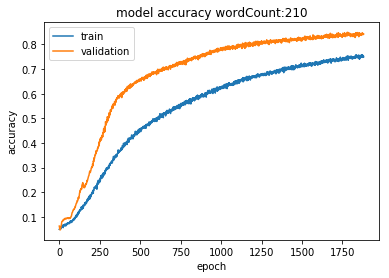

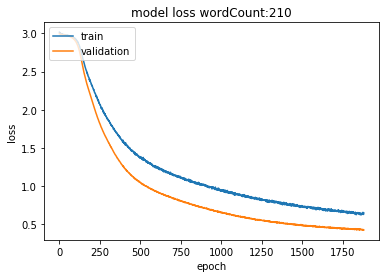

4672/5230 [=========================>....] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.0422 - acc: 0.0531 - val_loss: 2.9926 - val_acc: 0.0594
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 3.0301 - acc: 0.0535 - val_loss: 2.9921 - val_acc: 0.0594
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 3.0245 - acc: 0.0494 - val_loss: 2.9917 - val_acc: 0.0606
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 3.0181 - acc: 0.0553 - val_loss: 2.9914 - val_acc: 0.0619
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 3.0155 - acc: 0.0468 - val_loss: 2.9911 - val_acc: 0.0639
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 3.0083 - acc: 0.0514 - val_loss: 2.9910 - val_acc: 0.0709
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 3.0073 - acc: 0.0512 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9476 - acc: 0.0704 - val_loss: 2.9560 - val_acc: 0.1106
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9473 - acc: 0.0628 - val_loss: 2.9546 - val_acc: 0.1082
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9478 - acc: 0.0647 - val_loss: 2.9533 - val_acc: 0.1102
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9450 - acc: 0.0644 - val_loss: 2.9518 - val_acc: 0.1086
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9424 - acc: 0.0645 - val_loss: 2.9500 - val_acc: 0.1065
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9400 - acc: 0.0673 - val_loss: 2.9485 - val_acc: 0.1061
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9378 - acc: 0.0654 - val_loss: 2.9463 - val_acc: 0.1049
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9339 - acc: 0.0684 - val_loss: 2.9442 - val_ac

9762/9762 [==============================] - 0s - loss: 2.5746 - acc: 0.1313 - val_loss: 2.5127 - val_acc: 0.1786
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 2.5733 - acc: 0.1358 - val_loss: 2.5101 - val_acc: 0.1782
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 2.5767 - acc: 0.1317 - val_loss: 2.5104 - val_acc: 0.1786
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 2.5733 - acc: 0.1297 - val_loss: 2.5105 - val_acc: 0.1811
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 2.5658 - acc: 0.1289 - val_loss: 2.5049 - val_acc: 0.1770
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 2.5643 - acc: 0.1392 - val_loss: 2.5028 - val_acc: 0.1774
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 2.5645 - acc: 0.1292 - val_loss: 2.5016 - val_acc: 0.1889
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 2.5657 - acc: 0.1293 - val_loss: 2.5014 -

9762/9762 [==============================] - 0s - loss: 2.3717 - acc: 0.1546 - val_loss: 2.2857 - val_acc: 0.2106
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 2.3766 - acc: 0.1581 - val_loss: 2.2786 - val_acc: 0.2229
Epoch 318/5000
9762/9762 [==============================] - 0s - loss: 2.3693 - acc: 0.1580 - val_loss: 2.2762 - val_acc: 0.2233
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 2.3724 - acc: 0.1536 - val_loss: 2.2798 - val_acc: 0.2167
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 2.3701 - acc: 0.1571 - val_loss: 2.2760 - val_acc: 0.2257
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 2.3616 - acc: 0.1588 - val_loss: 2.2725 - val_acc: 0.2069
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 2.3647 - acc: 0.1602 - val_loss: 2.2740 - val_acc: 0.2249
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 2.3570 - acc: 0.1584 - val_loss: 2.2742 -

9762/9762 [==============================] - 0s - loss: 2.2173 - acc: 0.1867 - val_loss: 2.0749 - val_acc: 0.2663
Epoch 443/5000
9762/9762 [==============================] - 0s - loss: 2.2179 - acc: 0.1998 - val_loss: 2.0750 - val_acc: 0.2847
Epoch 444/5000
9762/9762 [==============================] - 0s - loss: 2.2132 - acc: 0.1899 - val_loss: 2.0748 - val_acc: 0.2798
Epoch 445/5000
9762/9762 [==============================] - 0s - loss: 2.2066 - acc: 0.1855 - val_loss: 2.0667 - val_acc: 0.2589
Epoch 446/5000
9762/9762 [==============================] - 0s - loss: 2.2087 - acc: 0.1960 - val_loss: 2.0763 - val_acc: 0.2565
Epoch 447/5000
9762/9762 [==============================] - 0s - loss: 2.2135 - acc: 0.1907 - val_loss: 2.0728 - val_acc: 0.2773
Epoch 448/5000
9762/9762 [==============================] - 0s - loss: 2.2007 - acc: 0.1915 - val_loss: 2.0713 - val_acc: 0.2827
Epoch 449/5000
9762/9762 [==============================] - 0s - loss: 2.2023 - acc: 0.2001 - val_loss: 2.0626 -

9762/9762 [==============================] - 0s - loss: 2.0365 - acc: 0.2390 - val_loss: 1.8171 - val_acc: 0.3593
Epoch 569/5000
9762/9762 [==============================] - 0s - loss: 2.0456 - acc: 0.2345 - val_loss: 1.8147 - val_acc: 0.3691
Epoch 570/5000
9762/9762 [==============================] - 0s - loss: 2.0484 - acc: 0.2394 - val_loss: 1.8298 - val_acc: 0.3470
Epoch 571/5000
9762/9762 [==============================] - 0s - loss: 2.0425 - acc: 0.2428 - val_loss: 1.8179 - val_acc: 0.3507
Epoch 572/5000
9762/9762 [==============================] - 0s - loss: 2.0434 - acc: 0.2382 - val_loss: 1.8113 - val_acc: 0.3372
Epoch 573/5000
9762/9762 [==============================] - 0s - loss: 2.0403 - acc: 0.2326 - val_loss: 1.8155 - val_acc: 0.3564
Epoch 574/5000
9762/9762 [==============================] - 0s - loss: 2.0374 - acc: 0.2439 - val_loss: 1.8074 - val_acc: 0.3531
Epoch 575/5000
9762/9762 [==============================] - 0s - loss: 2.0339 - acc: 0.2373 - val_loss: 1.8060 -

9762/9762 [==============================] - 0s - loss: 1.9052 - acc: 0.2809 - val_loss: 1.6357 - val_acc: 0.3978
Epoch 695/5000
9762/9762 [==============================] - 0s - loss: 1.8965 - acc: 0.2805 - val_loss: 1.6331 - val_acc: 0.4076
Epoch 696/5000
9762/9762 [==============================] - 0s - loss: 1.9124 - acc: 0.2826 - val_loss: 1.6344 - val_acc: 0.3941
Epoch 697/5000
9762/9762 [==============================] - 0s - loss: 1.9099 - acc: 0.2810 - val_loss: 1.6335 - val_acc: 0.4052
Epoch 698/5000
9762/9762 [==============================] - 0s - loss: 1.9014 - acc: 0.2788 - val_loss: 1.6281 - val_acc: 0.4121
Epoch 699/5000
9762/9762 [==============================] - 0s - loss: 1.8958 - acc: 0.2776 - val_loss: 1.6271 - val_acc: 0.4289
Epoch 700/5000
9762/9762 [==============================] - 0s - loss: 1.9107 - acc: 0.2675 - val_loss: 1.6256 - val_acc: 0.4097
Epoch 701/5000
9762/9762 [==============================] - 0s - loss: 1.9043 - acc: 0.2808 - val_loss: 1.6302 -

9762/9762 [==============================] - 0s - loss: 1.8511 - acc: 0.2949 - val_loss: 1.5656 - val_acc: 0.4515
Epoch 758/5000
9762/9762 [==============================] - 0s - loss: 1.8433 - acc: 0.3043 - val_loss: 1.5691 - val_acc: 0.4400
Epoch 759/5000
9762/9762 [==============================] - 0s - loss: 1.8446 - acc: 0.2956 - val_loss: 1.5633 - val_acc: 0.4474
Epoch 760/5000
9762/9762 [==============================] - 0s - loss: 1.8404 - acc: 0.3023 - val_loss: 1.5698 - val_acc: 0.4322
Epoch 761/5000
9762/9762 [==============================] - 0s - loss: 1.8501 - acc: 0.2966 - val_loss: 1.5672 - val_acc: 0.4383
Epoch 762/5000
9762/9762 [==============================] - 0s - loss: 1.8478 - acc: 0.2968 - val_loss: 1.5709 - val_acc: 0.4109
Epoch 763/5000
9762/9762 [==============================] - 0s - loss: 1.8494 - acc: 0.2951 - val_loss: 1.5682 - val_acc: 0.4609
Epoch 764/5000
9762/9762 [==============================] - 0s - loss: 1.8423 - acc: 0.2944 - val_loss: 1.5665 -

9762/9762 [==============================] - 0s - loss: 1.7498 - acc: 0.3299 - val_loss: 1.4408 - val_acc: 0.4449
Epoch 884/5000
9762/9762 [==============================] - 0s - loss: 1.7501 - acc: 0.3243 - val_loss: 1.4386 - val_acc: 0.4744
Epoch 885/5000
9762/9762 [==============================] - 0s - loss: 1.7545 - acc: 0.3183 - val_loss: 1.4448 - val_acc: 0.4347
Epoch 886/5000
9762/9762 [==============================] - 0s - loss: 1.7382 - acc: 0.3226 - val_loss: 1.4346 - val_acc: 0.4621
Epoch 887/5000
9762/9762 [==============================] - 0s - loss: 1.7512 - acc: 0.3190 - val_loss: 1.4398 - val_acc: 0.4535
Epoch 888/5000
9762/9762 [==============================] - 0s - loss: 1.7514 - acc: 0.3152 - val_loss: 1.4360 - val_acc: 0.4515
Epoch 889/5000
9762/9762 [==============================] - 0s - loss: 1.7514 - acc: 0.3213 - val_loss: 1.4478 - val_acc: 0.4461
Epoch 890/5000
9762/9762 [==============================] - 0s - loss: 1.7559 - acc: 0.3222 - val_loss: 1.4355 -

9762/9762 [==============================] - 0s - loss: 1.6554 - acc: 0.3360 - val_loss: 1.3435 - val_acc: 0.4674
Epoch 1010/5000
9762/9762 [==============================] - 0s - loss: 1.6637 - acc: 0.3436 - val_loss: 1.3477 - val_acc: 0.4556
Epoch 1011/5000
9762/9762 [==============================] - 0s - loss: 1.6530 - acc: 0.3415 - val_loss: 1.3391 - val_acc: 0.4777
Epoch 1012/5000
9762/9762 [==============================] - 0s - loss: 1.6592 - acc: 0.3396 - val_loss: 1.3479 - val_acc: 0.4744
Epoch 1013/5000
9762/9762 [==============================] - 0s - loss: 1.6526 - acc: 0.3438 - val_loss: 1.3441 - val_acc: 0.4515
Epoch 1014/5000
9762/9762 [==============================] - 0s - loss: 1.6581 - acc: 0.3454 - val_loss: 1.3413 - val_acc: 0.4937
Epoch 1015/5000
9762/9762 [==============================] - 0s - loss: 1.6650 - acc: 0.3375 - val_loss: 1.3447 - val_acc: 0.4383
Epoch 1016/5000
9762/9762 [==============================] - 0s - loss: 1.6490 - acc: 0.3408 - val_loss: 1

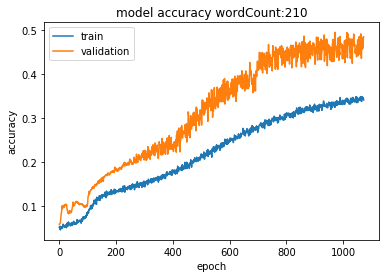

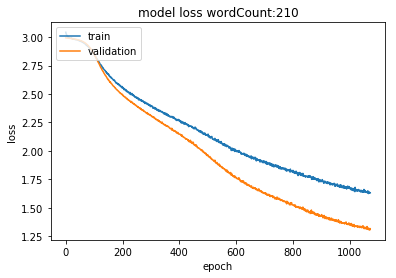

5056/5230 [============================>.] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.1009 - acc: 0.0480 - val_loss: 2.9958 - val_acc: 0.0520
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 3.0507 - acc: 0.0492 - val_loss: 2.9954 - val_acc: 0.0537
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 3.0283 - acc: 0.0494 - val_loss: 2.9952 - val_acc: 0.0467
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 3.0131 - acc: 0.0509 - val_loss: 2.9948 - val_acc: 0.0418
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 3.0078 - acc: 0.0512 - val_loss: 2.9946 - val_acc: 0.0442
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 3.0052 - acc: 0.0523 - val_loss: 2.9944 - val_acc: 0.0422
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 3.0029 - acc: 0.0529 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9790 - acc: 0.0614 - val_loss: 2.9884 - val_acc: 0.0877
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9786 - acc: 0.0629 - val_loss: 2.9880 - val_acc: 0.0905
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9780 - acc: 0.0625 - val_loss: 2.9878 - val_acc: 0.0905
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9781 - acc: 0.0642 - val_loss: 2.9877 - val_acc: 0.0873
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9773 - acc: 0.0627 - val_loss: 2.9874 - val_acc: 0.0901
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9775 - acc: 0.0617 - val_loss: 2.9873 - val_acc: 0.0897
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9776 - acc: 0.0603 - val_loss: 2.9871 - val_acc: 0.0922
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9779 - acc: 0.0641 - val_loss: 2.9872 - val_ac

9762/9762 [==============================] - 0s - loss: 2.7462 - acc: 0.1138 - val_loss: 2.7473 - val_acc: 0.1610
Epoch 191/5000
9762/9762 [==============================] - 0s - loss: 2.7369 - acc: 0.1178 - val_loss: 2.7424 - val_acc: 0.1643
Epoch 192/5000
9762/9762 [==============================] - 0s - loss: 2.7382 - acc: 0.1180 - val_loss: 2.7442 - val_acc: 0.1630
Epoch 193/5000
9762/9762 [==============================] - 0s - loss: 2.7315 - acc: 0.1195 - val_loss: 2.7372 - val_acc: 0.1659
Epoch 194/5000
9762/9762 [==============================] - 0s - loss: 2.7369 - acc: 0.1159 - val_loss: 2.7397 - val_acc: 0.1573
Epoch 195/5000
9762/9762 [==============================] - 0s - loss: 2.7292 - acc: 0.1175 - val_loss: 2.7295 - val_acc: 0.1577
Epoch 196/5000
9762/9762 [==============================] - 0s - loss: 2.7320 - acc: 0.1100 - val_loss: 2.7270 - val_acc: 0.1594
Epoch 197/5000
9762/9762 [==============================] - 0s - loss: 2.7277 - acc: 0.1207 - val_loss: 2.7243 -

9762/9762 [==============================] - 0s - loss: 2.5522 - acc: 0.1332 - val_loss: 2.5083 - val_acc: 0.1569
Epoch 317/5000
9762/9762 [==============================] - 0s - loss: 2.5623 - acc: 0.1285 - val_loss: 2.5083 - val_acc: 0.1594
Epoch 318/5000
9762/9762 [==============================] - ETA: 0s - loss: 2.5507 - acc: 0.132 - 0s - loss: 2.5523 - acc: 0.1321 - val_loss: 2.5069 - val_acc: 0.1602
Epoch 319/5000
9762/9762 [==============================] - 0s - loss: 2.5483 - acc: 0.1350 - val_loss: 2.5109 - val_acc: 0.1622
Epoch 320/5000
9762/9762 [==============================] - 0s - loss: 2.5497 - acc: 0.1297 - val_loss: 2.5059 - val_acc: 0.1512
Epoch 321/5000
9762/9762 [==============================] - 0s - loss: 2.5473 - acc: 0.1346 - val_loss: 2.5005 - val_acc: 0.1626
Epoch 322/5000
9762/9762 [==============================] - 0s - loss: 2.5518 - acc: 0.1268 - val_loss: 2.5037 - val_acc: 0.1643
Epoch 323/5000
9762/9762 [==============================] - 0s - loss: 2.5

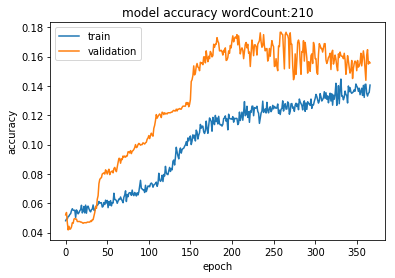

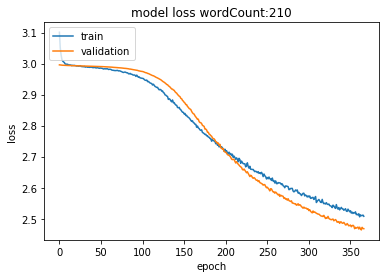

4672/5230 [=========================>....] - ETA: 0sword count: 210  finish .............
Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 0s - loss: 3.2922 - acc: 0.0570 - val_loss: 2.9957 - val_acc: 0.0512
Epoch 2/5000
9762/9762 [==============================] - 0s - loss: 3.0288 - acc: 0.0538 - val_loss: 2.9955 - val_acc: 0.0594
Epoch 3/5000
9762/9762 [==============================] - 0s - loss: 3.0064 - acc: 0.0569 - val_loss: 2.9955 - val_acc: 0.0533
Epoch 4/5000
9762/9762 [==============================] - 0s - loss: 3.0045 - acc: 0.0571 - val_loss: 2.9954 - val_acc: 0.0537
Epoch 5/5000
9762/9762 [==============================] - 0s - loss: 3.0008 - acc: 0.0573 - val_loss: 2.9953 - val_acc: 0.0524
Epoch 6/5000
9762/9762 [==============================] - 0s - loss: 2.9994 - acc: 0.0576 - val_loss: 2.9952 - val_acc: 0.0545
Epoch 7/5000
9762/9762 [==============================] - 0s - loss: 2.9975 - acc: 0.0569 - val_loss

9762/9762 [==============================] - 0s - loss: 2.9912 - acc: 0.0564 - val_loss: 2.9944 - val_acc: 0.0463
Epoch 65/5000
9762/9762 [==============================] - 0s - loss: 2.9909 - acc: 0.0590 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 66/5000
9762/9762 [==============================] - 0s - loss: 2.9909 - acc: 0.0598 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 67/5000
9762/9762 [==============================] - 0s - loss: 2.9915 - acc: 0.0570 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 68/5000
9762/9762 [==============================] - 0s - loss: 2.9913 - acc: 0.0559 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 69/5000
9762/9762 [==============================] - 0s - loss: 2.9914 - acc: 0.0557 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 70/5000
9762/9762 [==============================] - 0s - loss: 2.9912 - acc: 0.0557 - val_loss: 2.9945 - val_acc: 0.0463
Epoch 71/5000
9762/9762 [==============================] - 0s - loss: 2.9915 - acc: 0.0543 - val_loss: 2.9945 - val_ac

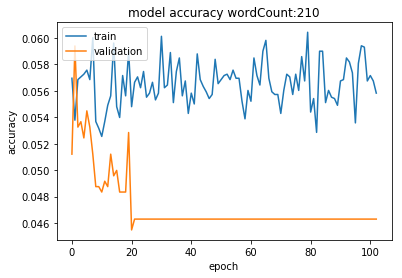

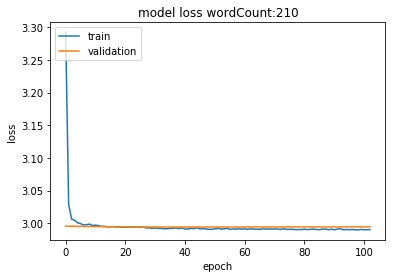

4736/5230 [==========================>...] - ETA: 0sword count: 210  finish .............


In [25]:
#使用最好的wordCount参数对dropout参数进行寻找最好的参数

x_train,y_train = getData(data_train,base_model,210)
x_test,y_test = getData(data_test,base_model,210)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

dropout_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_accuracy = []
test_loss = []
for dropOut in dropout_list:
    learning_rate = 0.03
    epochs = 5000
    batch_size = 1024
    #创建神经网络模型
    model = Sequential()
    #创建输入层
    model.add(Dense(100, input_dim=300,activation="relu"))
    #创建Dropout层防止过拟合
    model.add(Dropout(dropOut))
    #创建隐藏层
    model.add(Dense(200, activation="relu"))
    #创建Dropout层防止过拟合
    model.add(Dropout(dropOut))
    #创建隐藏层
    model.add(Dense(300, activation="relu"))
    #创建Dropout层防止过拟合
    model.add(Dropout(dropOut))
    #创建输出层
    model.add(Dense(20, activation="softmax"))
    #创建优化器
    sgd = optimizers.SGD(lr=learning_rate)
    #训练模型 使用keras的回调函数提前终止
    callback_loss = EarlyStopping(monitor="val_loss",patience=100,mode="min")
    callback_accuracy = EarlyStopping(monitor="val_acc",patience=100,mode="max")
    #训练模型
    model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])
    model.save("dropout_"+str(dropOut)+".model")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=[callback_loss,callback_accuracy])
    #输出训练集和验证集准确率的图像
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy dropOut:'+ str(dropOut))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    #输出训练集和验证集loss的图像
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss dropOut:' + str(dropOut))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    loss, accuracy = model.evaluate(x_test, y_test)
    test_accuracy.append(accuracy)
    test_loss.append(loss)
    model.save(str(wordCount) + "_model.h5")
    
    print("dropout :",wordCount," finish .............")
    

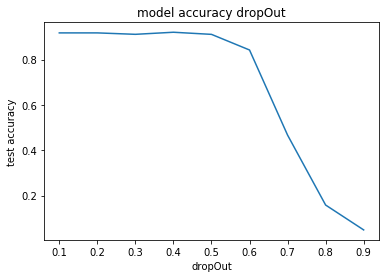

In [28]:
plt.plot(dropout_list,test_accuracy)
plt.title('model accuracy dropOut')
plt.ylabel('test accuracy')
plt.xlabel('dropOut')
plt.show()

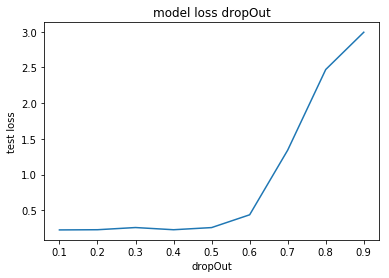

In [29]:
plt.plot(dropout_list,test_loss)
plt.title('model loss dropOut')
plt.ylabel('test loss')
plt.xlabel('dropOut')
plt.show()


In [26]:
test_accuracy

[0.91816443594646269,
 0.91816443594646269,
 0.91185468451242835,
 0.92103250478011467,
 0.91166347992351815,
 0.84263862341813334,
 0.46692160620972029,
 0.15812619506287073,
 0.048183556405353725]

In [27]:
test_loss

[0.22412049316909755,
 0.22678792265957901,
 0.25746558477842102,
 0.22666673370090315,
 0.25680588772716301,
 0.4360271955083479,
 1.3419202752140695,
 2.4718125888540001,
 2.9938800065968736]

In [31]:
from keras.layers import Dense, Dropout, regularizers,Embedding,LSTM


#lstm 模型
lstm_keep_pro = 0.2
lstm_learning_rate = 0.01
lstm_epochs = 5000
lstm_batch_size = 256

input_height = 300
input_width = 1
#获取训练集和测试集数据
#就像图像处理将图片reshape28*28 的结构，这里将300维的向量reshap 300*1方便作为LSTM的输入
x_train,y_train = getData(data_train,base_model,210)
x_test,y_test = getData(data_test,base_model,210)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
#创建模型
model = Sequential()

x_train_ltsm = x_train.reshape(-1,input_height,input_width)
x_test_lstm = x_test.reshape(-1,input_height,input_width)
#创建LSTM层
model.add(LSTM(units=64,input_shape=(input_height,input_width),return_sequences=False))
# model.add(LSTM(units=32,input_shape=(input_height,input_width),return_sequences=False))
#创建Dropout层防止过拟合
model.add(Dropout(lstm_keep_pro))
#创建输出层
model.add(Dense(20,activation="softmax"))
#创建优化器
optimizer = optimizers.Adam(lr=lstm_learning_rate)
#训练模型 使用keras的回调函数提前终止
callback_loss = EarlyStopping(monitor="val_loss",patience=20,mode="min")
callback_accuracy = EarlyStopping(monitor="val_acc",patience=20,mode="max")
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['acc'])
#训练模型 使用keras的回调函数提前终止
history = model.fit(x_train_ltsm, y_train, batch_size=lstm_batch_size, epochs=lstm_epochs, validation_split=0.2,callbacks=[callback_loss,callback_accuracy])



Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 35s - loss: 2.9803 - acc: 0.0642 - val_loss: 2.9575 - val_acc: 0.0561
Epoch 2/5000
9762/9762 [==============================] - 33s - loss: 2.9232 - acc: 0.0956 - val_loss: 2.8779 - val_acc: 0.1286
Epoch 3/5000
9762/9762 [==============================] - 34s - loss: 2.9465 - acc: 0.1034 - val_loss: 2.9001 - val_acc: 0.1225
Epoch 4/5000
9762/9762 [==============================] - 34s - loss: 2.9242 - acc: 0.1103 - val_loss: 2.8935 - val_acc: 0.0881
Epoch 5/5000
9762/9762 [==============================] - 34s - loss: 2.8414 - acc: 0.1372 - val_loss: 2.7758 - val_acc: 0.1770
Epoch 6/5000
9762/9762 [==============================] - 35s - loss: 2.6633 - acc: 0.1821 - val_loss: 2.7990 - val_acc: 0.1446
Epoch 7/5000
9762/9762 [==============================] - 35s - loss: 2.7257 - acc: 0.1555 - val_loss: 2.7884 - val_acc: 0.1262
Epoch 8/5000
9762/9762 [==============================] 

KeyboardInterrupt: 

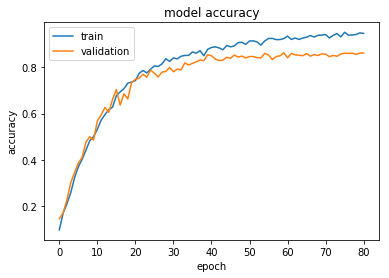

In [50]:
#输出训练集和验证集准确率的图像
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

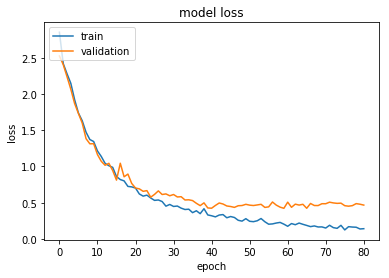

In [51]:
#输出训练集和验证集loss的图像
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
#输出测试集的loss和准确率
x_test_lstm = np.asarray(x_test_lstm)
y_test = np.asarray(y_test)

loss, accuracy = model.evaluate(x_test_lstm, y_test)
print("------------")
print("test loss:", loss, "test accuracy", accuracy)

5230/5230 [==============================] - 6s     
------------
test loss: 0.455235817134 test accuracy 0.8548757172


In [40]:
#使用cnn：
from keras.layers import Dense, Dropout, regularizers,Convolution1D,MaxPooling1D,Flatten

#cnn 模型
#
cnn_keep_pro = 0.2
#学习率
cnn_learning_rate = 0.005
#训练轮数
cnn_epochs = 5000
#输入数据的size
cnn_batch_size = 256

#词向量转成序列的大小
input_height = 300
input_width = 1
#将文档向量做一个reshap，方便作为CNN的输入
x_train_cnn = x_train.reshape(-1,input_height,input_width)
x_test_cnn = x_test.reshape(-1,input_height,input_width)

#得到训练集合测试集数据
x_train,y_train = getData(data_train,base_model,170)
x_test,y_test = getData(data_test,base_model,170)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

model = Sequential()
#创建卷积层
model.add(Convolution1D(input_shape=(input_height,input_width),filters=64,kernel_size=2,strides=1,activation="relu",padding="same"))
#创建Maxpooling层
model.add(MaxPooling1D(pool_size=2,strides=2,padding="same"))
#创建卷积层
model.add(Convolution1D(filters=128,kernel_size=2,strides=1,activation="relu",padding="same"))
#创建Maxpooling层
model.add(MaxPooling1D(pool_size=2,strides=2,padding="same"))
#创建卷积层
model.add(Convolution1D(filters=64,kernel_size=2,strides=1,activation="relu",padding="same"))
#创建Maxpooling层
model.add(MaxPooling1D(pool_size=2,strides=2,padding="same"))
#创建Dropout层 防止过拟合
model.add(Dropout(cnn_keep_pro))
#扁平化
model.add(Flatten())
#创建全连接层
model.add(Dense(256,activation="relu"))
model.add(Dropout(cnn_keep_pro))
model.add(Dense(64,activation="relu"))
model.add(Dropout(cnn_keep_pro))
model.add(Dense(20,activation="softmax"))
#创建优化器
optimizer = optimizers.Adam(lr=cnn_learning_rate)
#训练模型 使用keras的回调函数提前终止
callback_loss = EarlyStopping(monitor="val_loss",patience=20,mode="min")
callback_accuracy = EarlyStopping(monitor="val_acc",patience=20,mode="max")
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['acc'])
#训练模型
history = model.fit(x_train_cnn, y_train, batch_size=cnn_batch_size, epochs=cnn_epochs, validation_split=0.2,callbacks=[callback_loss,callback_accuracy])



Train on 9762 samples, validate on 2441 samples
Epoch 1/5000
9762/9762 [==============================] - 3s - loss: 2.9181 - acc: 0.0774 - val_loss: 2.7622 - val_acc: 0.1180
Epoch 2/5000
9762/9762 [==============================] - 1s - loss: 2.5985 - acc: 0.1305 - val_loss: 2.4119 - val_acc: 0.1557
Epoch 3/5000
9762/9762 [==============================] - 1s - loss: 2.3560 - acc: 0.1738 - val_loss: 2.2550 - val_acc: 0.1762
Epoch 4/5000
9762/9762 [==============================] - 1s - loss: 2.1057 - acc: 0.2325 - val_loss: 1.8979 - val_acc: 0.2728
Epoch 5/5000
9762/9762 [==============================] - 1s - loss: 1.8014 - acc: 0.3022 - val_loss: 1.6004 - val_acc: 0.3720
Epoch 6/5000
9762/9762 [==============================] - 1s - loss: 1.6258 - acc: 0.3590 - val_loss: 1.7854 - val_acc: 0.3249
Epoch 7/5000
9762/9762 [==============================] - 1s - loss: 1.4691 - acc: 0.4210 - val_loss: 1.2768 - val_acc: 0.4941
Epoch 8/5000
9762/9762 [==============================] - 1s - 

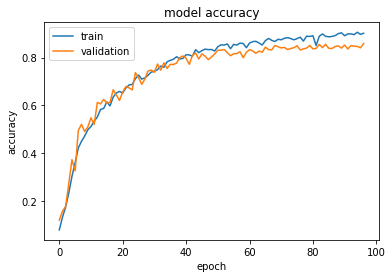

In [41]:
#输出训练集和验证集准确率的图像
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

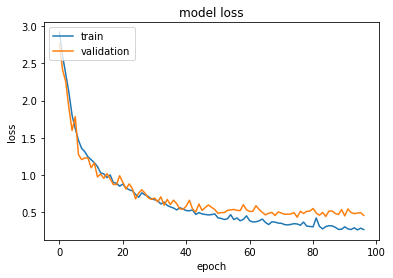

In [42]:
#输出训练集和验证集loss的图像
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
#输出测试集的loss和准确率
x_test_cnn = np.asarray(x_test_cnn)
y_test = np.asarray(y_test)

loss, accuracy = model.evaluate(x_test_cnn, y_test)
print("------------")
print("test loss:", loss, "test accuracy", accuracy)

5216/5230 [============================>.] - ETA: 0s------------
test loss: 0.445553701523 test accuracy 0.867495219976
